In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import requests

def download_file_from_github(url, local_filename):
    # Send a GET request to the specified URL
    response = requests.get(url)

    # Raise an error if the request was not successful
    response.raise_for_status()

    # Save the content to a local file
    with open(local_filename, 'wb') as file:
        file.write(response.content)

    return local_filename

# URLs to your GitHub files (raw file links)
# unscaled_url = 'https://raw.githubusercontent.com/sydney-machine-learning/deeplearning_timeseries/master/data/Mackey/mackey.dat'
scaled_url = 'https://raw.githubusercontent.com/sydney-machine-learning/deeplearning_timeseries/refs/heads/master/data/Lorenz/scaled_dataset.txt'

# Download the files locally
# unscaled_file = download_file_from_github(unscaled_url, 'unscaled_file.dat')
scaled_file = download_file_from_github(scaled_url, 'scaled_file.txt')

# Load the datasets
# unscaled_data = np.loadtxt(unscaled_file, max_rows = 1000)
scaled_data = np.loadtxt(scaled_file)

np.size(scaled_data)


1000

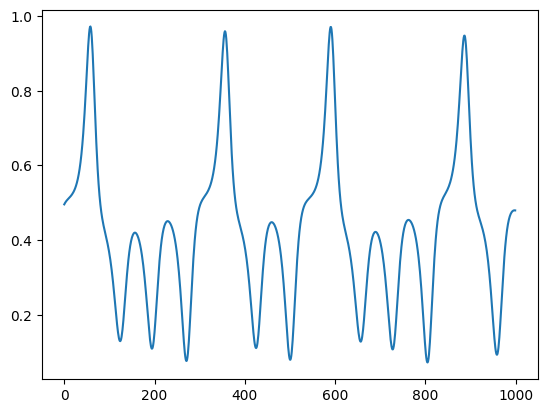

In [2]:
plt.plot(scaled_data)

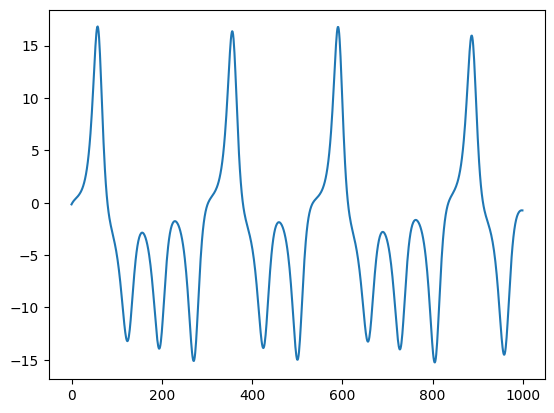

In [3]:
unscaled_url = 'https://raw.githubusercontent.com/sydney-machine-learning/deeplearning_timeseries/refs/heads/master/data/Lorenz/lorenz.dat'

unscaled_file = download_file_from_github(unscaled_url, 'unscaled_file.dat')

unscaled_data = np.loadtxt(unscaled_file, max_rows = 1000)

plt.plot(unscaled_data)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Lorenz system
sigma = 10.0
r = 28.0
b = 8.0/3.0

# Lorenz system of equations
def lorenz_equations(x, y, z):
    dxdt = sigma * (y - x)
    dydt = r * x - y - x * z
    dzdt = x * y - b * z
    return dxdt, dydt, dzdt

def rk4_step(x, y, z, dt):
    # k1
    dx1, dy1, dz1 = lorenz_equations(x, y, z)
    k1x = dx1 * dt
    k1y = dy1 * dt
    k1z = dz1 * dt

    # k2
    dx2, dy2, dz2 = lorenz_equations(x + 0.5*k1x, y + 0.5*k1y, z + 0.5*k1z)
    k2x = dx2 * dt
    k2y = dy2 * dt
    k2z = dz2 * dt

    # k3
    dx3, dy3, dz3 = lorenz_equations(x + 0.5*k2x, y + 0.5*k2y, z + 0.5*k2z)
    k3x = dx3 * dt
    k3y = dy3 * dt
    k3z = dz3 * dt

    # k4
    dx4, dy4, dz4 = lorenz_equations(x + k3x, y + k3y, z + k3z)
    k4x = dx4 * dt
    k4y = dy4 * dt
    k4z = dz4 * dt

    # Combine
    x_new = x + (k1x + 2*k2x + 2*k3x + k4x)/6.0
    y_new = y + (k1y + 2*k2y + 2*k3y + k4y)/6.0
    z_new = z + (k1z + 2*k2z + 2*k3z + k4z)/6.0

    return x_new, y_new, z_new

# Simulation parameters
dt = 0.01
t_max = 50.0
steps = int(t_max/dt)

# Initial conditions
x = 1.0
y = 1.0
z = 1.0

# Arrays to store results
t_values = np.zeros(steps+1)
x_values = np.zeros(steps+1)
y_values = np.zeros(steps+1)
z_values = np.zeros(steps+1)
dx_values = np.zeros(steps+1)

x_values[0] = x
y_values[0] = y
z_values[0] = z

# Perform the integration
for i in range(steps):
    # Compute dx/dt at current step for plotting purposes
    dxdt, _, _ = lorenz_equations(x, y, z)
    dx_values[i] = dxdt

    x, y, z = rk4_step(x, y, z, dt)
    x_values[i+1] = x
    y_values[i+1] = y
    z_values[i+1] = z
    t_values[i+1] = t_values[i] + dt

# Compute dx/dt for the last step
dxdt, _, _ = lorenz_equations(x, y, z)
dx_values[-1] = dxdt


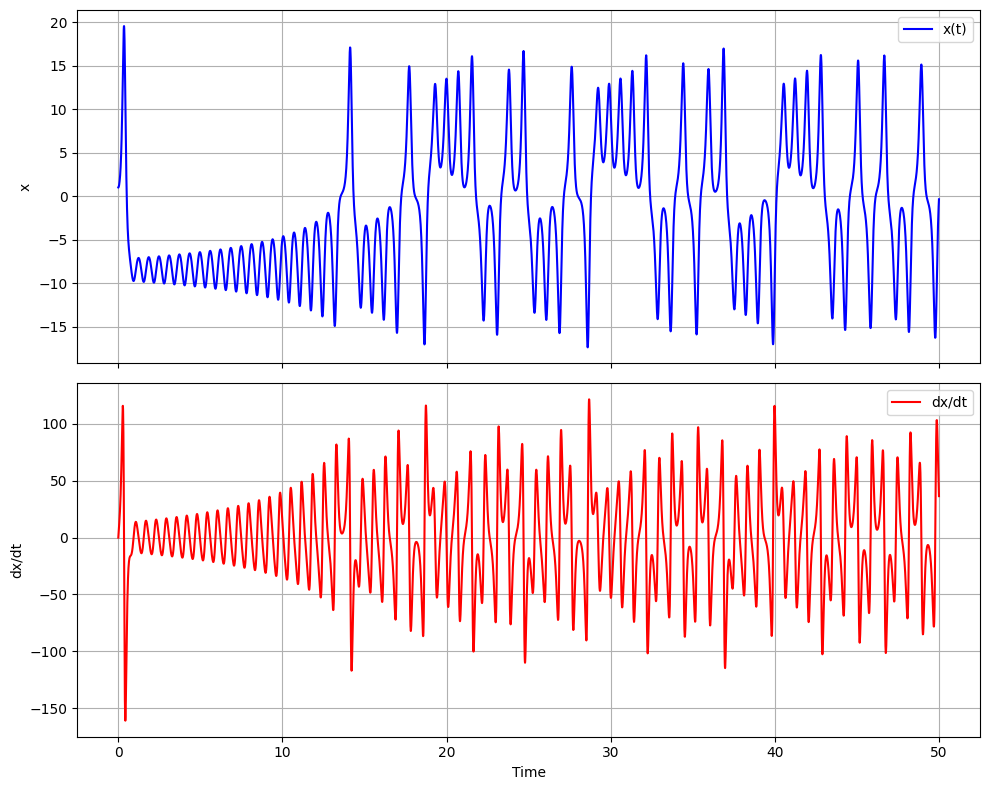

In [5]:
# Plot results
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax[0].plot(t_values, x_values, label='x(t)', color='blue')
ax[0].set_ylabel('x')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(t_values, dx_values, label='dx/dt', color='red')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('dx/dt')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

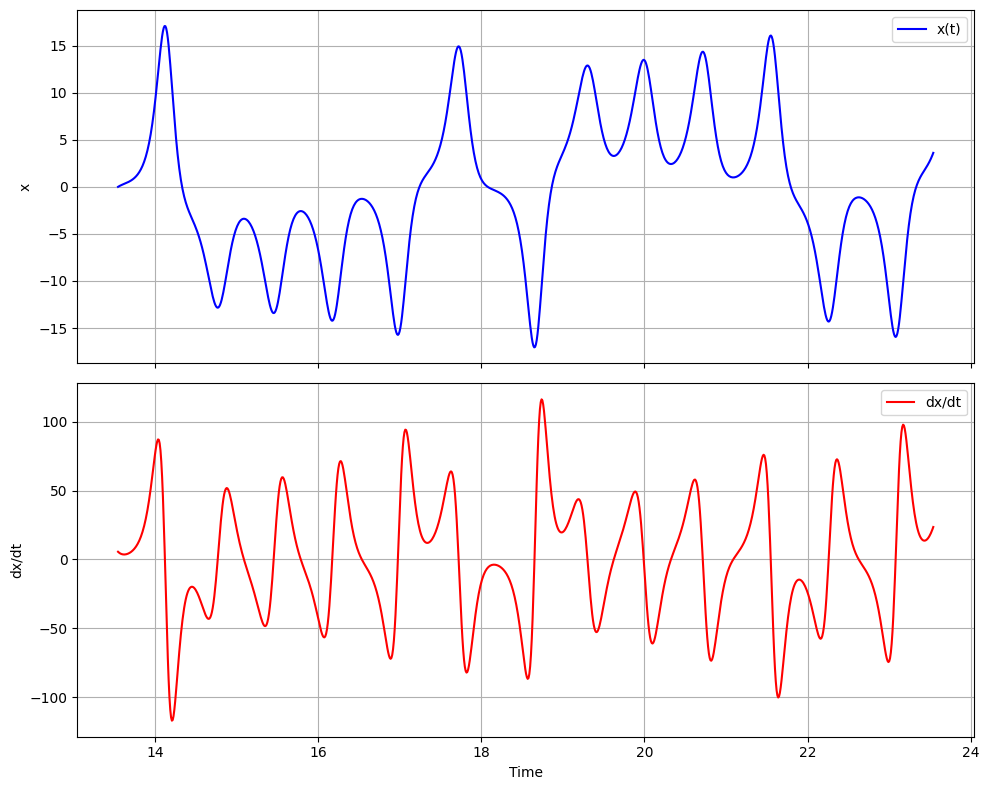

In [6]:
# Find zero-crossings of x
zero_crossings = []
for i in range(1, len(x_values)):
    # A zero crossing occurs if x changes sign between x[i-1] and x[i]
    if x_values[i-1] * x_values[i] < 0:
        zero_crossings.append(i)

if len(zero_crossings) < 2:
    print("Less than two zero crossings found in the given time range.")
else:
    # Get the index of the second zero crossing
    second_zero_idx = zero_crossings[1]

    # We want 100 points from the second zero crossing
    end_idx = second_zero_idx + 1000
    if end_idx > len(x_values):
        end_idx = len(x_values)

    # Extract the segment
    t_segment = t_values[second_zero_idx:end_idx]
    x_segment = x_values[second_zero_idx:end_idx]
    dx_segment = dx_values[second_zero_idx:end_idx]

    # Plot the extracted data
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    ax1.plot(t_segment, x_segment, label='x(t)', color='blue')
    ax1.set_ylabel('x')
    ax1.grid(True)
    ax1.legend()

    ax2.plot(t_segment, dx_segment, label='dx/dt', color='red')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('dx/dt')
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [7]:
# Ensure x_segment and dx_segment are NumPy arrays
x_segment = np.array(x_segment)
dx_segment = np.array(dx_segment)

# Reshape to 2D since MinMaxScaler expects (n_samples, n_features)
x_segment_2d = x_segment.reshape(-1, 1)
dx_segment_2d = dx_segment.reshape(-1, 1)

scaler_original = MinMaxScaler(feature_range=(-0.5, 0.5))  # For original series
scaler_diff = MinMaxScaler(feature_range=(-0.5, 0.5))     # For differential series

# Fit the scalers on the reshaped data
scaler_original.fit(x_segment_2d)
scaler_diff.fit(dx_segment_2d)

# Transform the data
scaled_original_correct_2d = scaler_original.transform(x_segment_2d)
scaled_diff_correct_2d = scaler_diff.transform(dx_segment_2d)

# Optionally flatten back to 1D arrays if preferred
scaled_original_correct = scaled_original_correct_2d.flatten()
scaled_diff_correct = scaled_diff_correct_2d.flatten()

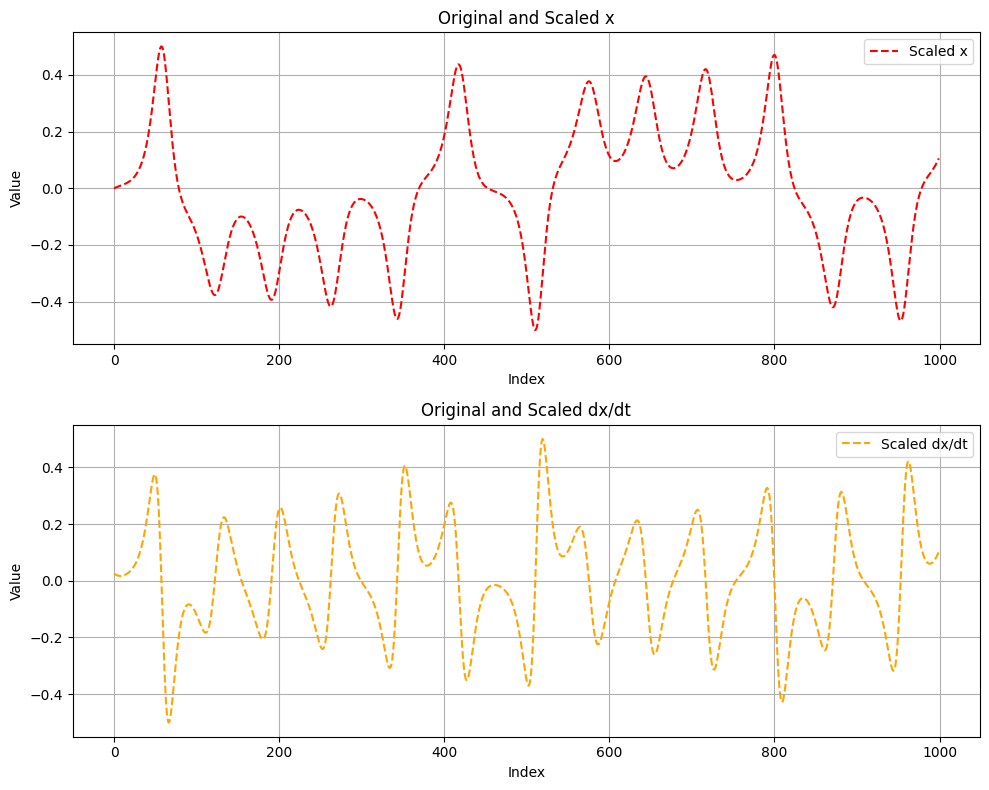

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x_segment = np.array(x_segment)
dx_segment = np.array(dx_segment)
scaled_original_correct = np.array(scaled_original_correct)
scaled_diff_correct = np.array(scaled_diff_correct)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot original vs scaled for x_segment
# ax1.plot(x_segment, label='Original x', color='blue')
ax1.plot(scaled_original_correct, label='Scaled x', color='red', linestyle='--')
ax1.set_title('Original and Scaled x')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')
ax1.grid(True)
ax1.legend()

# Plot original vs scaled for dx_segment
# ax2.plot(dx_segment, label='Original dx/dt', color='green')
ax2.plot(scaled_diff_correct, label='Scaled dx/dt', color='orange', linestyle='--')
ax2.set_title('Original and Scaled dx/dt')
ax2.set_xlabel('Index')
ax2.set_ylabel('Value')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


In [9]:
# Recalculate the exact minimum length across all series for proper alignment
min_length_input = len(scaled_data) - 10  # Adjusting based on the offset needed for inputs
min_length_output = len(scaled_data) - 15  # Further reduced for outputs to align properly

# Use the smaller of the two lengths to ensure all columns align
final_consistent_length = min(min_length_input, min_length_output)

# Initialize a new DataFrame for the corrected output
formatted_df_corrected_final = pd.DataFrame()

# Add the first five columns as Input1...Input5 using scaled_data
for i in range(5):
    formatted_df_corrected_final[f'Input{i+1}'] = scaled_original_correct[i:final_consistent_length + i].flatten()

# Add the next four columns as Input_Differential1...Input_Differential4 using differential_scaled
for i in range(4):
    formatted_df_corrected_final[f'Input_Differential{i+1}'] = scaled_diff_correct[i:final_consistent_length + i].flatten()

# Add the next ten columns as Output1...Output10 using scaled_data
for i in range(10):
    formatted_df_corrected_final[f'Output{i+1}'] = scaled_original_correct[(i + 5):(final_consistent_length + i + 5)].flatten()

# Add the next nine columns as Output_Differential1...Output_Differential9 using differential_scaled
for i in range(10):
    formatted_df_corrected_final[f'Output_Differential{i+1}'] = scaled_diff_correct[(i + 4):(final_consistent_length + i + 4)].flatten()

# Ensure all columns have the same length by truncating to the smallest consistent length
formatted_df_corrected_final = formatted_df_corrected_final.iloc[12:final_consistent_length]
formatted_df_corrected_final_Lorenz = formatted_df_corrected_final.reset_index(drop=True)

formatted_df_corrected_final_Lorenz.head(10)

Input1    Input2    Input3    Input4    Input5  Input_Differential1  \
0  0.013832  0.015087  0.016427  0.017865  0.019416             0.019524   
1  0.015087  0.016427  0.017865  0.019416  0.021098             0.020643   
2  0.016427  0.017865  0.019416  0.021098  0.022927             0.021977   
3  0.017865  0.019416  0.021098  0.022927  0.024922             0.023531   
4  0.019416  0.021098  0.022927  0.024922  0.027101             0.025316   
5  0.021098  0.022927  0.024922  0.027101  0.029488             0.027343   
6  0.022927  0.024922  0.027101  0.029488  0.032103             0.029629   
7  0.024922  0.027101  0.029488  0.032103  0.034974             0.032191   
8  0.027101  0.029488  0.032103  0.034974  0.038128             0.035054   
9  0.029488  0.032103  0.034974  0.038128  0.041595             0.038242   

   Input_Differential2  Input_Differential3  Input_Differential4   Output1  \
0             0.020643             0.021977             0.023531  0.021098   
1             0.021977             0.023531             0.025316  0.022927   
2             0.023531             0.025316             0.027343  0.024922   
3             0.025316             0.027343             0.029629  0.027101   
4             0.027343             0.029629             0.032191  0.029488   
5             0.029629             0.032191             0.035054  0.032103   
6             0.032191             0.035054             0.038242  0.034974   
7             0.035054             0.038242             0.041785  0.038128   
8             0.038242             0.041785             0.045717  0.041595   
9             0.041785             0.045717             0.050075  0.045409   

   ...  Output_Differential1  Output_Differential2  Output_Differential3  \
0  ...              0.025316              0.027343              0.029629   
1  ...              0.027343              0.029629              0.032191   
2  ...              0.029629              0.032191              0.035054   
3  ...              0.032191              0.035054              0.038242   
4  ...              0.035054              0.038242              0.041785   
5  ...              0.038242              0.041785              0.045717   
6  ...              0.041785              0.045717              0.050075   
7  ...              0.045717              0.050075              0.054900   
8  ...              0.050075              0.054900              0.060239   
9  ...              0.054900              0.060239              0.066141   

   Output_Differential4  Output_Differential5  Output_Differential6  \
0              0.032191              0.035054              0.038242   
1              0.035054              0.038242              0.041785   
2              0.038242              0.041785              0.045717   
3              0.041785              0.045717              0.050075   
4              0.045717              0.050075              0.054900   
5              0.050075              0.054900              0.060239   
6              0.054900              0.060239              0.066141   
7              0.060239              0.066141              0.072661   
8              0.066141              0.072661              0.079858   
9              0.072661              0.079858              0.087795   

   Output_Differential7  Output_Differential8  Output_Differential9  \
0              0.041785              0.045717              0.050075   
1              0.045717              0.050075              0.054900   
2              0.050075              0.054900              0.060239   
3              0.054900              0.060239              0.066141   
4              0.060239              0.066141              0.072661   
5              0.066141              0.072661              0.079858   
6              0.072661              0.079858              0.087795   
7              0.079858              0.087795              0.096540   
8              0.087795              0.096540      

In [10]:
# Step 1: Create the Training DataFrame (First 580 Rows)
train_data_scaled_Lorenz_final = formatted_df_corrected_final_Lorenz.iloc[:586].reset_index(drop=True)

# Step 2: Create the Testing DataFrame (Remaining Rows)
test_data_scaled_Lorenz_final = formatted_df_corrected_final_Lorenz.iloc[586:].reset_index(drop=True)

# Step 3: Create the Testing DataFrame Without Output and Output Differential Columns
# Drop the Output and Output_Differential columns
columns_to_drop = [col for col in formatted_df_corrected_final_Lorenz.columns if 'Output' in col]
test_data_scaled_without_output = test_data_scaled_Lorenz_final.drop(columns=columns_to_drop).reset_index(drop=True)

# train_unscaled_df.head(20)
# test_unscaled_df.tail(5)
test_data_scaled_without_output.tail(5)

Input1    Input2    Input3    Input4    Input5  Input_Differential1  \
382  0.012719  0.018721  0.024188  0.029216  0.033891             0.093959   
383  0.018721  0.024188  0.029216  0.033891  0.038294             0.085410   
384  0.024188  0.029216  0.033891  0.038294  0.042499             0.078297   
385  0.029216  0.033891  0.038294  0.042499  0.046575             0.072512   
386  0.033891  0.038294  0.042499  0.046575  0.050585             0.067955   

     Input_Differential2  Input_Differential3  Input_Differential4  
382             0.085410             0.078297             0.072512  
383             0.078297             0.072512             0.067955  
384             0.072512             0.067955             0.064530  
385             0.067955             0.064530             0.062149  
386             0.064530             0.062149             0.060733

In [11]:
train_df = train_data_scaled_Lorenz_final
test_df = test_data_scaled_Lorenz_final

# Display the first few rows of the datasets to understand their structure
train_df.head(), test_df.head()

(     Input1    Input2    Input3    Input4    Input5  Input_Differential1  \
 0  0.013832  0.015087  0.016427  0.017865  0.019416             0.019524   
 1  0.015087  0.016427  0.017865  0.019416  0.021098             0.020643   
 2  0.016427  0.017865  0.019416  0.021098  0.022927             0.021977   
 3  0.017865  0.019416  0.021098  0.022927  0.024922             0.023531   
 4  0.019416  0.021098  0.022927  0.024922  0.027101             0.025316   
 
    Input_Differential2  Input_Differential3  Input_Differential4   Output1  \
 0             0.020643             0.021977             0.023531  0.021098   
 1             0.021977             0.023531             0.025316  0.022927   
 2             0.023531             0.025316             0.027343  0.024922   
 3             0.025316             0.027343             0.029629  0.027101   
 4             0.027343             0.029629             0.032191  0.029488   
 
    ...  Output_Differential1  Output_Differential2  Output_

In [12]:
# Extracting inputs and outputs for training
X_train_original = train_df[['Input1', 'Input2', 'Input3', 'Input4', 'Input5']].values.reshape(-1, 5, 1)
X_train_diff = train_df[['Input_Differential1', 'Input_Differential2', 'Input_Differential3', 'Input_Differential4']].values.reshape(-1, 4, 1)

# Outputs
# Identify the output columns (assuming they are named Output1, Output2, ..., Output10)
output_columns = [f'Output{i+1}' for i in range(10)]

# Extract Y_train for original outputs using the identified columns
Y_train_original = train_df[output_columns].values
Y_train_diff = train_df[[col for col in train_df.columns if 'Output_Differential' in col]].values

# Reshape the test data in the same way
X_test_original = test_df[['Input1', 'Input2', 'Input3', 'Input4', 'Input5']].values.reshape(-1, 5, 1)
X_test_diff = test_df[['Input_Differential1', 'Input_Differential2', 'Input_Differential3', 'Input_Differential4']].values.reshape(-1, 4, 1)

# Extract the test ground truth outputs (original and differential)
Y_test_original = test_df[['Output1', 'Output2', 'Output3', 'Output4', 'Output5',
                                       'Output6', 'Output7', 'Output8', 'Output9', 'Output10']].values
Y_test_diff = test_df[[col for col in test_df.columns if 'Output_Differential' in col]].values

# Confirming the shapes
X_train_original.shape, X_train_diff.shape, Y_train_original.shape, Y_train_diff.shape, X_test_original.shape, X_test_diff.shape, Y_test_original.shape, Y_test_diff.shape

((586, 5, 1),
 (586, 4, 1),
 (586, 10),
 (586, 10),
 (387, 5, 1),
 (387, 4, 1),
 (387, 10),
 (387, 10))

In [13]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version: ", tf.__version__)

# Print details of the GPU if available
gpu_devices = tf.config.list_physical_devices('GPU')
for gpu in gpu_devices:
    print(gpu)

Num GPUs Available:  1
TensorFlow version:  2.18.0
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [14]:
# ************Using Custom Loss Functions*********
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate
from tensorflow.keras.models import Model
import numpy as np
import time

def rmse(y_true, y_pred):
    error = np.subtract(y_pred, y_true)
    sqerror = np.sum(np.square(error)) / y_true.shape[0]
    return np.sqrt(sqerror)

def MODEL_twin_LSTM(x_train_original, x_train_diff, x_test_original, x_test_diff,
                    y_train_original, y_train_diff, y_test_original, y_test_diff,
                    Num_Exp, n_steps_in, n_steps_out, Epochs, Hidden):
    n_features = 1

    # Reshape the data for LSTM input
    x_train_original = x_train_original.reshape((x_train_original.shape[0], x_train_original.shape[1], n_features))
    x_train_diff = x_train_diff.reshape((x_train_diff.shape[0], x_train_diff.shape[1], n_features))
    x_test_original = x_test_original.reshape((x_test_original.shape[0], x_test_original.shape[1], n_features))
    x_test_diff = x_test_diff.reshape((x_test_diff.shape[0], x_test_diff.shape[1], n_features))

    # Initialize arrays to store results from experiments
    train_acc_original = np.zeros(Num_Exp)
    train_acc_diff = np.zeros(Num_Exp)
    test_acc_original = np.zeros(Num_Exp)
    test_acc_diff = np.zeros(Num_Exp)
    Step_RMSE_original = np.zeros([Num_Exp, n_steps_out])
    Step_RMSE_diff = np.zeros([Num_Exp, n_steps_out])

    Best_RMSE = 1000  # Assigning a large initial number

    # Define the model outside the loop (reusing the model across experiments)
    input_original = Input(shape=(n_steps_in, n_features), name='input_original')
    input_diff = Input(shape=(n_steps_in - 1, n_features), name='input_diff')

    # Shared LSTM layer
    shared_lstm = LSTM(units=Hidden, activation='tanh', return_sequences=False, name='shared_lstm')

    # Process inputs through the shared LSTM layer
    original_lstm_output = shared_lstm(input_original)
    diff_lstm_output = shared_lstm(input_diff)

    # Concatenate the LSTM outputs
    combined_output = Concatenate()([original_lstm_output, diff_lstm_output])

    # Predict outputs using the combined LSTM outputs
    output_original = Dense(units=n_steps_out, activation='linear', name='output_original')(combined_output)
    output_diff = Dense(units=n_steps_out, activation='linear', name='output_diff')(combined_output)

    # Define the model
    model = Model(inputs=[input_original, input_diff], outputs=[output_original, output_diff])

    # Define the optimizer outside the loop
    optimizer = tf.keras.optimizers.Adam()

    # Define custom loss functions for each output
    def custom_loss_original(y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred))

    def custom_loss_diff(y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred))

    # Assign custom losses to each output
    losses = {
        'output_original': custom_loss_original,
        'output_diff': custom_loss_diff
    }

    # Optionally, assign loss weights
    loss_weights = {
        'output_original': 0.5,
        'output_diff': 0.5
    }

    # Compile the model once before the loop using custom loss functions
    model.compile(optimizer=optimizer, loss=losses, loss_weights=loss_weights)

    # Print model summary to ensure architecture is correct
    model.summary()

    start_time = time.time()
    for run in range(Num_Exp):
        print(f"Experiment {run + 1} in progress")

        # Train the model
        history = model.fit(
            x=[x_train_original, x_train_diff],
            y=[y_train_original, y_train_diff],
            epochs=Epochs,
            batch_size=32,
            verbose=0,
            shuffle=False
        )

        # Print loss after training
        final_loss = history.history['loss'][-1]
        print(f"Final loss for experiment {run + 1}: {final_loss}")

        # Predict on training and testing sets
        y_predicttrain_original, y_predicttrain_diff = model.predict([x_train_original, x_train_diff])
        y_predicttest_original, y_predicttest_diff = model.predict([x_test_original, x_test_diff])

        # Calculate RMSE for training and test sets (both original and differential)
        train_acc_original[run] = rmse(y_train_original, y_predicttrain_original)
        train_acc_diff[run] = rmse(y_train_diff, y_predicttrain_diff)
        test_acc_original[run] = rmse(y_test_original, y_predicttest_original)
        test_acc_diff[run] = rmse(y_test_diff, y_predicttest_diff)

        # Update the best RMSE and save the best predictions
        if test_acc_original[run] < Best_RMSE:
            Best_RMSE = test_acc_original[run]
            Best_Predict_Test = [y_predicttest_original, y_predicttest_diff]

        # Calculate RMSE for each step in the predicted sequence on the test data
        for j in range(n_steps_out):
            Step_RMSE_original[run][j] = rmse(y_test_original[:, j], y_predicttest_original[:, j])
            Step_RMSE_diff[run][j] = rmse(y_test_diff[:, j], y_predicttest_diff[:, j])

    print("Total time for", Num_Exp, "experiments:", time.time() - start_time)
    return train_acc_original, train_acc_diff, test_acc_original, test_acc_diff, Step_RMSE_original, Step_RMSE_diff, Best_Predict_Test

# Example usage of the function
train_acc_original, train_acc_diff, test_acc_original, test_acc_diff, Step_RMSE_original, Step_RMSE_diff, Best_Predict_Test = MODEL_twin_LSTM(
    x_train_original=X_train_original,
    x_train_diff=X_train_diff,
    x_test_original=X_test_original,
    x_test_diff=X_test_diff,
    y_train_original=Y_train_original,
    y_train_diff=Y_train_diff,
    y_test_original=Y_test_original,
    y_test_diff=Y_test_diff,
    Num_Exp=30,
    n_steps_in=5,
    n_steps_out=10,
    Epochs=1000,  # Consider reducing epochs to prevent overfitting
    Hidden=10
)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_original            │ (None, 5, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_diff (InputLayer)   │ (None, 4, 1)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ shared_lstm (LSTM)        │ (None, 10)             │            480 │ input_original[0][0],  │
│                           │                        │                │ input_diff[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 20)             │              0 │ shared_lstm[0][0],     │
│                           │                        │                │ shared_lstm[1][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_original (Dense)   │ (None, 10)             │            210 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_diff (Dense)       │ (None, 10)             │            210 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 900 (3.52 KB)

 Trainable params: 900 (3.52 KB)

 Non-trainable params: 0 (0.00 B)

Experiment 1 in progress
Final loss for experiment 1: 0.0004943186067976058
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Experiment 2 in progress
Final loss for experiment 2: 0.00019606799469329417
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Experiment 3 in progress
Final loss for experiment 3: 8.932359196478501e-05
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Experiment 4 in progress
Final loss for experiment 4: 4.344532862887718e-05
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Experiment 5 in progress
Final loss for experiment 5: 3.91729518014472e-05
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Experiment 6 in progress
Final loss for experiment 6: 3.9532740629510954e-05
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Experiment 7 in progress
Final loss for experiment 7: 3.02882308

In [15]:
# Prepare and display results
def prepare_results(train_acc, test_acc, Step_RMSE, Num_Exp, n_steps_out):
    arr = np.dstack((train_acc, test_acc))
    arr = arr.reshape(Num_Exp, 2)
    arr = np.concatenate((arr, Step_RMSE), axis=1)
    arr = arr.reshape(Num_Exp, 2 + n_steps_out)

    ExpIndex = np.array(["Exp" + str(j + 1) for j in range(Num_Exp)])
    ExpIndex1 = ['TrainRMSE', 'TestRMSE'] + ["Step" + str(j + 1) for j in range(n_steps_out)]

    arr_df = pd.DataFrame(np.round_(arr, decimals=5), index=ExpIndex, columns=ExpIndex1)

    print("Results:")
    print(arr_df)

    return arr_df

arr_original_df = prepare_results(train_acc_original, test_acc_original, Step_RMSE_original, 30, 10)

Results:
       TrainRMSE  TestRMSE    Step1    Step2    Step3    Step4    Step5  \
Exp1     0.03716   0.03173  0.00555  0.00562  0.00554  0.00811  0.00738   
Exp2     0.02120   0.01985  0.00437  0.00328  0.00347  0.00586  0.00571   
Exp3     0.01380   0.01289  0.00240  0.00210  0.00314  0.00370  0.00409   
Exp4     0.00921   0.00905  0.00145  0.00171  0.00229  0.00201  0.00240   
Exp5     0.01006   0.01002  0.00245  0.00267  0.00292  0.00264  0.00272   
Exp6     0.00997   0.00894  0.00137  0.00140  0.00165  0.00206  0.00218   
Exp7     0.01238   0.01085  0.00250  0.00272  0.00293  0.00279  0.00304   
Exp8     0.00882   0.00793  0.00170  0.00185  0.00199  0.00214  0.00231   
Exp9     0.00735   0.00688  0.00143  0.00147  0.00148  0.00145  0.00156   
Exp10    0.01090   0.00915  0.00257  0.00266  0.00264  0.00239  0.00245   
Exp11    0.00740   0.00788  0.00132  0.00144  0.00160  0.00176  0.00202   
Exp12    0.01111   0.00971  0.00094  0.00103  0.00152  0.00222  0.00275   
Exp13    0.00593

<ipython-input-15-08c7a4d388d6>:18: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  arr_original_df = prepare_results(train_acc_original, test_acc_original, Step_RMSE_original, 30, 10)


In [16]:
# Compute and display statistics
def calculate_statistics(train_acc, test_acc, Step_RMSE, n_steps_out, Num_Exp):
    Train_Mean = np.mean(train_acc)
    Train_Std = np.std(train_acc)
    Train_CI_LB = Train_Mean - 1.96 * (Train_Std / np.sqrt(Num_Exp))
    Train_CI_UB = Train_Mean + 1.96 * (Train_Std / np.sqrt(Num_Exp))

    Test_Mean = np.mean(test_acc)
    Test_Std = np.std(test_acc)
    Test_CI_LB = Test_Mean - 1.96 * (Test_Std / np.sqrt(Num_Exp))
    Test_CI_UB = Test_Mean + 1.96 * (Test_Std / np.sqrt(Num_Exp))

    arr1 = np.vstack((
        [Train_Mean, Train_Std, Train_CI_LB, Train_CI_UB, np.min(train_acc), np.max(train_acc)],
        [Test_Mean, Test_Std, Test_CI_LB, Test_CI_UB, np.min(test_acc), np.max(test_acc)]
    ))

    for j in range(n_steps_out):
        Step_mean = np.mean(Step_RMSE[:, j])
        Step_std = np.std(Step_RMSE[:, j])
        Step_min = np.min(Step_RMSE[:, j])
        Step_CI_LB = Step_mean - 1.96 * (Step_std / np.sqrt(Num_Exp))
        Step_CI_UB = Step_mean + 1.96 * (Step_std / np.sqrt(Num_Exp))
        arr1 = np.vstack((arr1, [Step_mean, Step_std, Step_CI_LB, Step_CI_UB, Step_min, np.max(Step_RMSE[:, j])]))

    return pd.DataFrame(np.round_(arr1, decimals=5), index=arr_original_df.columns,
                        columns=['Mean', 'Standard Deviation', 'CI_LB', 'CI_UB', 'Min', 'Max'])

stats_original_df = calculate_statistics(train_acc_original, test_acc_original, Step_RMSE_original, 10, 30)

print("\nSummary Statistics:")
print(stats_original_df)



Summary Statistics:
              Mean  Standard Deviation    CI_LB    CI_UB      Min      Max
TrainRMSE  0.00938             0.00635  0.00711  0.01165  0.00414  0.03716
TestRMSE   0.00868             0.00534  0.00677  0.01059  0.00435  0.03173
Step1      0.00167             0.00106  0.00129  0.00205  0.00064  0.00555
Step2      0.00169             0.00100  0.00133  0.00204  0.00063  0.00562
Step3      0.00183             0.00103  0.00146  0.00219  0.00066  0.00554
Step4      0.00209             0.00151  0.00155  0.00263  0.00075  0.00811
Step5      0.00224             0.00141  0.00174  0.00274  0.00087  0.00738
Step6      0.00251             0.00157  0.00194  0.00307  0.00109  0.00889
Step7      0.00290             0.00199  0.00218  0.00361  0.00135  0.01184
Step8      0.00318             0.00185  0.00252  0.00385  0.00163  0.01081
Step9      0.00366             0.00214  0.00289  0.00442  0.00199  0.01243
Step10     0.00419             0.00281  0.00318  0.00519  0.00238  0.01741


<ipython-input-16-7de0ef72532a>:29: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  stats_original_df = calculate_statistics(train_acc_original, test_acc_original, Step_RMSE_original, 10, 30)


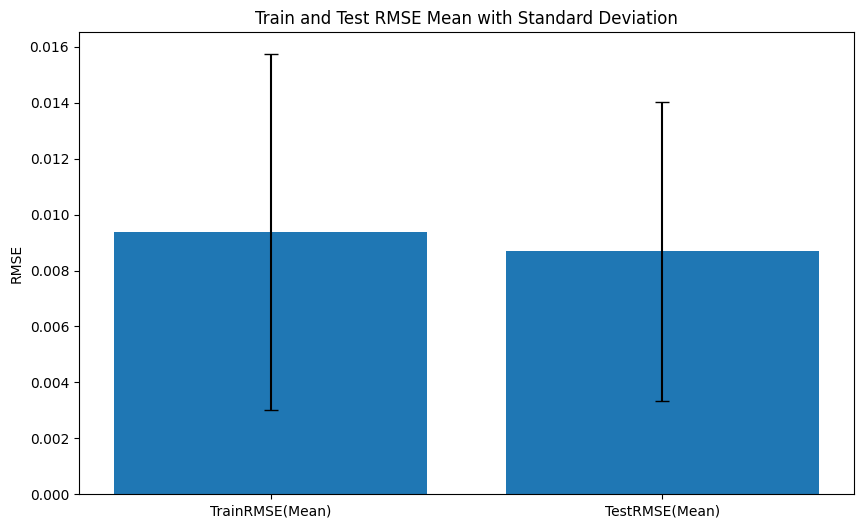

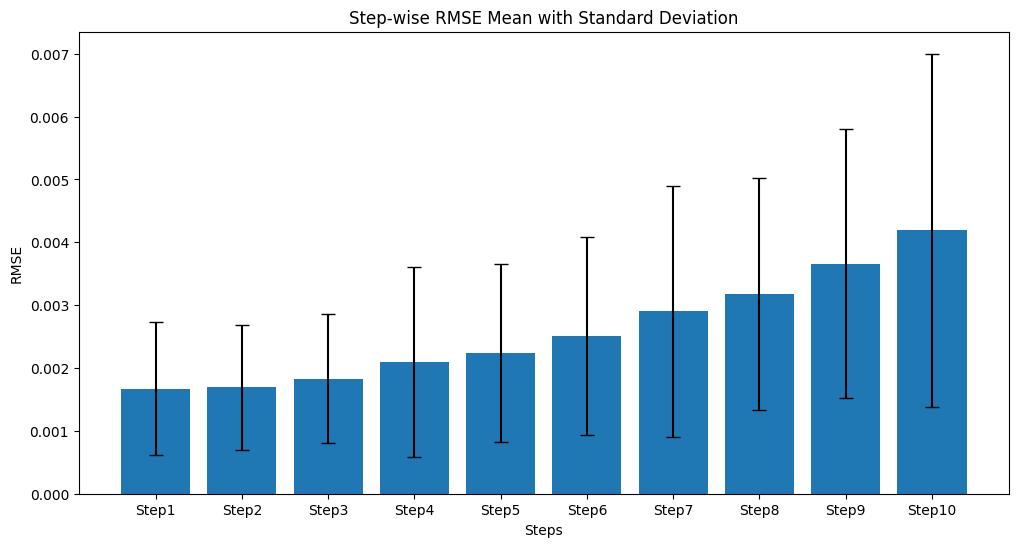

In [17]:
import matplotlib.pyplot as plt

# Plot the results
def plot_rmse_means(stats_df, n_steps_out):
    # Plot TrainRMSE and TestRMSE
    plt.figure(figsize=(10, 6))
    plt.bar(['TrainRMSE(Mean)', 'TestRMSE(Mean)'],
            stats_df['Mean'][:2], yerr=stats_df['Standard Deviation'][:2], capsize=5)
    plt.title('Train and Test RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    plt.show()

    # Plot Step-wise RMSE Mean
    plt.figure(figsize=(12, 6))
    plt.bar([f'Step{j+1}' for j in range(n_steps_out)],
            stats_df['Mean'][2:], yerr=stats_df['Standard Deviation'][2:], capsize=5)
    plt.title('Step-wise RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    plt.xlabel('Steps')
    plt.show()

plot_rmse_means(stats_original_df, 10)

In [18]:
import numpy as np
import pandas as pd

def prepare_and_save_results(train_acc_original, test_acc_original, Step_RMSE_original,
                             train_acc_diff, test_acc_diff, Step_RMSE_diff,
                             Num_Exp, n_steps_out, name):

    # Combine results for tabular display for original series
    arr_original = np.dstack((train_acc_original, test_acc_original))
    arr_original = arr_original.reshape(Num_Exp, 2)
    arr_original = np.concatenate((arr_original, Step_RMSE_original), axis=1)
    arr_original = arr_original.reshape(Num_Exp, 2 + n_steps_out)

    # Combine results for tabular display for differential series
    arr_diff = np.dstack((train_acc_diff, test_acc_diff))
    arr_diff = arr_diff.reshape(Num_Exp, 2)
    arr_diff = np.concatenate((arr_diff, Step_RMSE_diff), axis=1)
    arr_diff = arr_diff.reshape(Num_Exp, 2 + n_steps_out)

    ExpIndex = np.array(["Exp" + str(j + 1) for j in range(Num_Exp)])
    ExpIndex1 = ['TrainRMSE', 'TestRMSE'] + ["Step" + str(j + 1) for j in range(n_steps_out)]

    arr_original_df = pd.DataFrame(np.round_(arr_original, decimals=5), index=ExpIndex, columns=ExpIndex1)
    arr_diff_df = pd.DataFrame(np.round_(arr_diff, decimals=5), index=ExpIndex, columns=ExpIndex1)

    print("Original Series Results:")
    print(arr_original_df)
    print("\nDifferential Series Results:")
    print(arr_diff_df)

    # # Save to CSV
    # arr_original_df.to_csv(f"Results/{name}/ExpAnalysis_Original.csv")
    # arr_diff_df.to_csv(f"Results/{name}/ExpAnalysis_Differential.csv")

    return arr_original_df, arr_diff_df

In [19]:
def calculate_and_save_statistics(arr_original_df, arr_diff_df, train_acc_original, test_acc_original,
                                  train_acc_diff, test_acc_diff, Step_RMSE_original, Step_RMSE_diff,
                                  Num_Exp, n_steps_out, name):

    # Function to calculate statistics for a given array
    def calculate_statistics(train_acc, test_acc, Step_RMSE, n_steps_out, Num_Exp):
        Train_Mean = np.mean(train_acc)
        Train_Std = np.std(train_acc)
        Train_CI_LB = Train_Mean - 1.96 * (Train_Std / np.sqrt(Num_Exp))
        Train_CI_UB = Train_Mean + 1.96 * (Train_Std / np.sqrt(Num_Exp))

        Test_Mean = np.mean(test_acc)
        Test_Std = np.std(test_acc)
        Test_CI_LB = Test_Mean - 1.96 * (Test_Std / np.sqrt(Num_Exp))
        Test_CI_UB = Test_Mean + 1.96 * (Test_Std / np.sqrt(Num_Exp))

        arr1 = np.vstack((
            [Train_Mean, Train_Std, Train_CI_LB, Train_CI_UB, np.min(train_acc), np.max(train_acc)],
            [Test_Mean, Test_Std, Test_CI_LB, Test_CI_UB, np.min(test_acc), np.max(test_acc)]
        ))

        for j in range(n_steps_out):
            Step_mean = np.mean(Step_RMSE[:, j])
            Step_std = np.std(Step_RMSE[:, j])
            Step_min = np.min(Step_RMSE[:, j])
            Step_CI_LB = Step_mean - 1.96 * (Step_std / np.sqrt(Num_Exp))
            Step_CI_UB = Step_mean + 1.96 * (Step_std / np.sqrt(Num_Exp))
            arr1 = np.vstack((arr1, [Step_mean, Step_std, Step_CI_LB, Step_CI_UB, Step_min, np.max(Step_RMSE[:, j])]))

        return pd.DataFrame(np.round_(arr1, decimals=5), index=arr_original_df.columns,
                            columns=['Mean', 'Standard Deviation', 'CI_LB', 'CI_UB', 'Min', 'Max'])

    # Calculate statistics for original and differential series
    stats_original_df = calculate_statistics(train_acc_original, test_acc_original, Step_RMSE_original, n_steps_out, Num_Exp)
    stats_diff_df = calculate_statistics(train_acc_diff, test_acc_diff, Step_RMSE_diff, n_steps_out, Num_Exp)

    print("\nOriginal Series Summary:")
    print(stats_original_df)
    print("\nDifferential Series Summary:")
    print(stats_diff_df)

    # # Save to CSV
    # stats_original_df.to_csv(f"Results/{name}/OverallAnalysis_Original.csv")
    # stats_diff_df.to_csv(f"Results/{name}/OverallAnalysis_Differential.csv")

    return stats_original_df, stats_diff_df


In [20]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(Best_Predict_Test, y_test_original, y_test_diff, n_steps_out, name):

    # Plot actual vs predicted for original series
    x_data = np.linspace(0, y_test_original.shape[0], num=y_test_original.shape[0])
    for j in range(n_steps_out):
        plt.figure()
        plt.plot(x_data, y_test_original[:, j], label='actual')
        plt.plot(x_data, Best_Predict_Test[0][:, j], label='predicted')
        plt.ylabel('Value')
        plt.xlabel('Time (samples)')
        plt.title(f'Original Series: Actual vs Predicted (Step {j+1})')
        plt.legend()
        # plt.savefig(f"Results/{name}/pred_Step{j+1}_Original.png", dpi=300)
        plt.show()
        plt.close()

    # Plot actual vs predicted for differential series
    x_data = np.linspace(0, y_test_diff.shape[0], num=y_test_diff.shape[0])
    for j in range(n_steps_out):
        plt.figure()
        plt.plot(x_data, y_test_diff[:, j], label='actual')
        plt.plot(x_data, Best_Predict_Test[1][:, j], label='predicted')
        plt.ylabel('Value')
        plt.xlabel('Time (samples)')
        plt.title(f'Differential Series: Actual vs Predicted (Step {j+1})')
        plt.legend()
        # plt.savefig(f"Results/{name}/pred_Step{j+1}_Differential.png", dpi=300)
        plt.show()
        plt.close()



In [21]:
def plot_rmse_means(stats_original_df, stats_diff_df, n_steps_out, name):

    # Plot TrainRMSE and TestRMSE for original series
    plt.figure(figsize=(10, 6))
    plt.bar(['TrainRMSE(Mean)', 'TestRMSE(Mean)'],
            stats_original_df['Mean'][:2], yerr=stats_original_df['Standard Deviation'][:2], capsize=5)
    plt.title('Original Series: Train and Test RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    # plt.savefig(f"Results/{name}/RMSE_Mean_Original.png", dpi=300)
    plt.show()

    # Plot TrainRMSE and TestRMSE for differential series
    plt.figure(figsize=(10, 6))
    plt.bar(['TrainRMSE(Mean)', 'TestRMSE(Mean)'],
            stats_diff_df['Mean'][:2], yerr=stats_diff_df['Standard Deviation'][:2], capsize=5)
    plt.title('Differential Series: Train and Test RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    # plt.savefig(f"Results/{name}/RMSE_Mean_Differential.png", dpi=300)
    plt.show()

    # Plot Step-wise RMSE Mean for original series
    plt.figure(figsize=(12, 6))
    plt.bar([f'Step{j+1}' for j in range(n_steps_out)],
            stats_original_df['Mean'][2:], yerr=stats_original_df['Standard Deviation'][2:], capsize=5)
    plt.title('Original Series: Step-wise RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    plt.xlabel('Steps')
    # plt.savefig(f"Results/{name}/Step_RMSE_Mean_Original.png", dpi=300)
    plt.show()

    # Plot Step-wise RMSE Mean for differential series
    plt.figure(figsize=(12, 6))
    plt.bar([f'Step{j+1}' for j in range(n_steps_out)],
            stats_diff_df['Mean'][2:], yerr=stats_diff_df['Standard Deviation'][2:], capsize=5)
    plt.title('Differential Series: Step-wise RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    plt.xlabel('Steps')
    # plt.savefig(f"Results/{name}/Step_RMSE_Mean_Differential.png", dpi=300)
    plt.show()

<ipython-input-22-572858e077ba>:8: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  arr_original_df, arr_diff_df = prepare_and_save_results(
<ipython-input-22-572858e077ba>:8: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  arr_original_df, arr_diff_df = prepare_and_save_results(
<ipython-input-19-3152937568f1>:34: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  stats_original_df = calculate_statistics(train_acc_original, test_acc_original, Step_RMSE_original, n_steps_out, Num_Exp)
<ipython-input-19-3152937568f1>:35: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  stats_diff_df = calculate_statistics(train_acc_diff, test_acc_diff, Step_RMSE_diff, n_steps_out, Num_Exp)


Original Series Results:
       TrainRMSE  TestRMSE    Step1    Step2    Step3    Step4    Step5  \
Exp1     0.03716   0.03173  0.00555  0.00562  0.00554  0.00811  0.00738   
Exp2     0.02120   0.01985  0.00437  0.00328  0.00347  0.00586  0.00571   
Exp3     0.01380   0.01289  0.00240  0.00210  0.00314  0.00370  0.00409   
Exp4     0.00921   0.00905  0.00145  0.00171  0.00229  0.00201  0.00240   
Exp5     0.01006   0.01002  0.00245  0.00267  0.00292  0.00264  0.00272   
Exp6     0.00997   0.00894  0.00137  0.00140  0.00165  0.00206  0.00218   
Exp7     0.01238   0.01085  0.00250  0.00272  0.00293  0.00279  0.00304   
Exp8     0.00882   0.00793  0.00170  0.00185  0.00199  0.00214  0.00231   
Exp9     0.00735   0.00688  0.00143  0.00147  0.00148  0.00145  0.00156   
Exp10    0.01090   0.00915  0.00257  0.00266  0.00264  0.00239  0.00245   
Exp11    0.00740   0.00788  0.00132  0.00144  0.00160  0.00176  0.00202   
Exp12    0.01111   0.00971  0.00094  0.00103  0.00152  0.00222  0.00275   


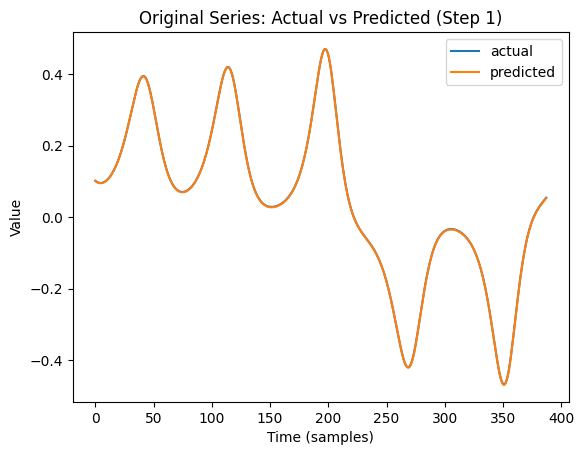

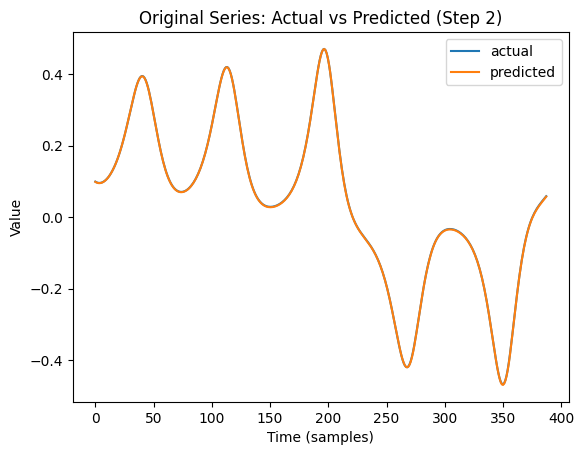

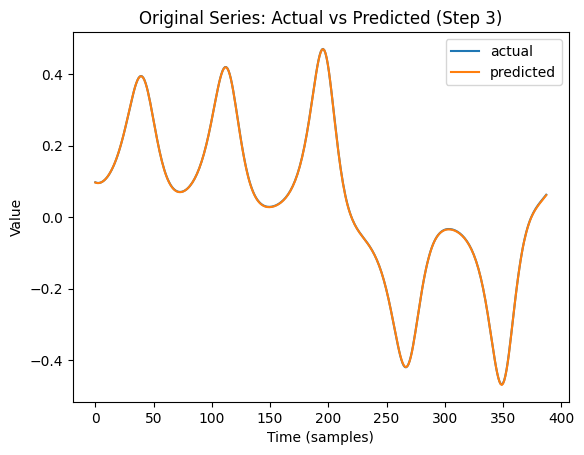

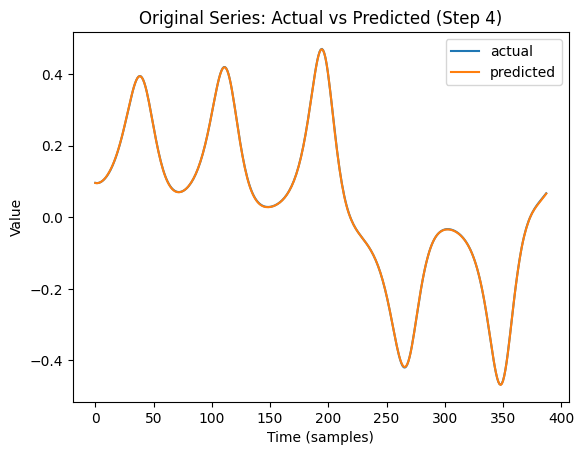

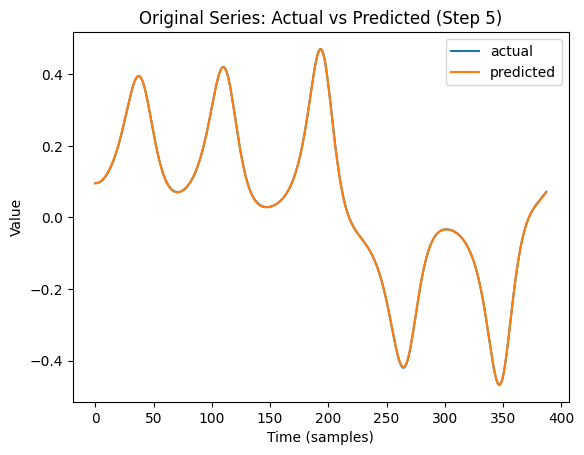

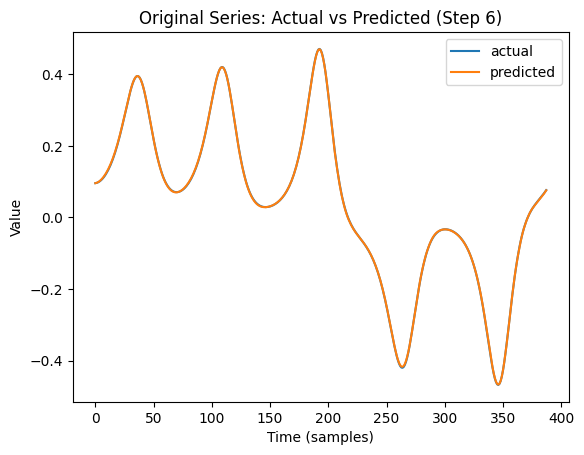

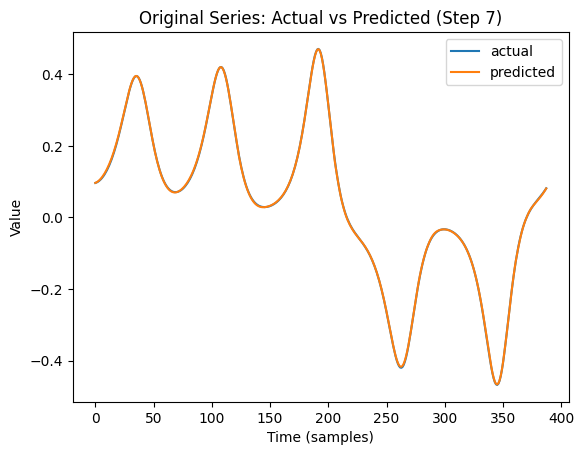

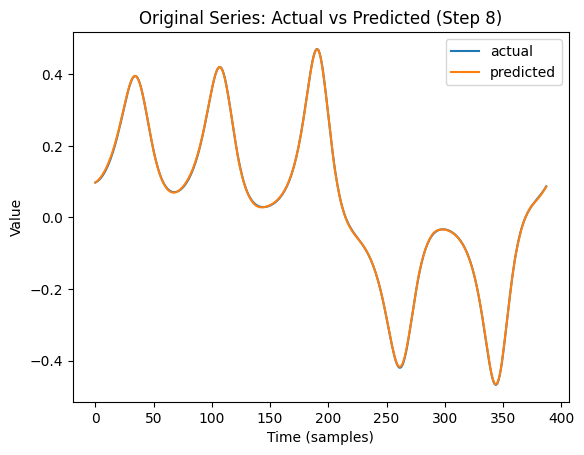

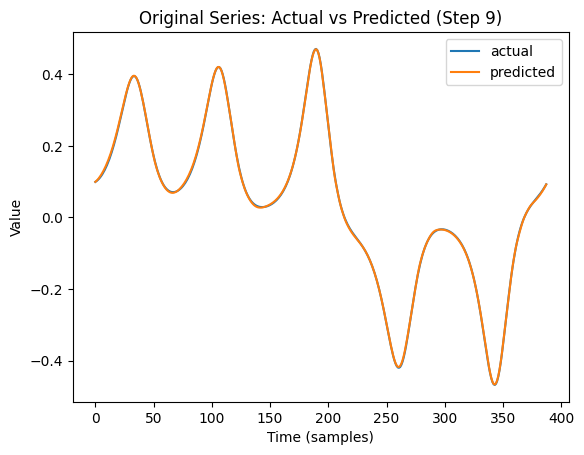

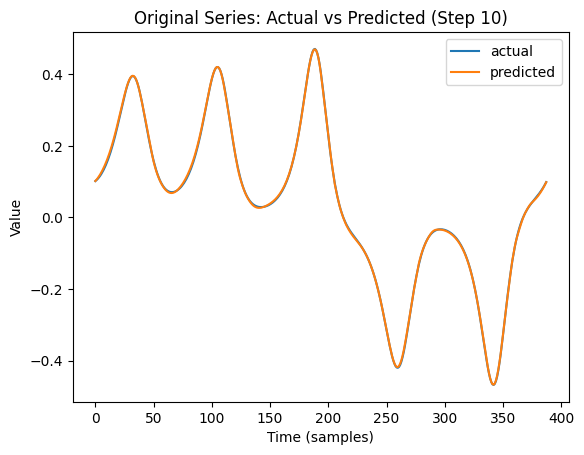

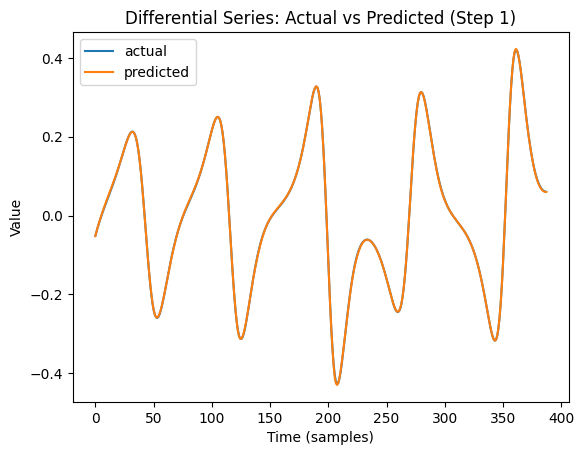

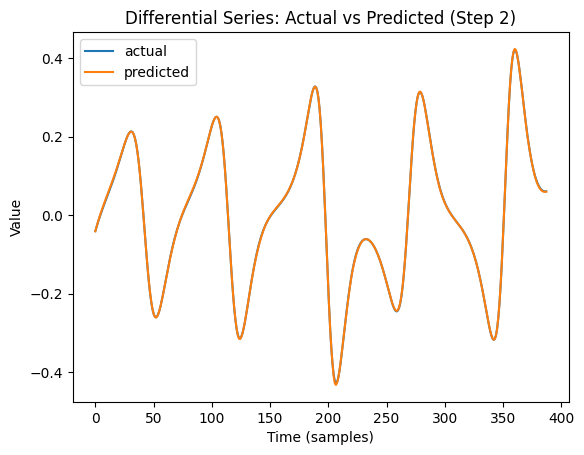

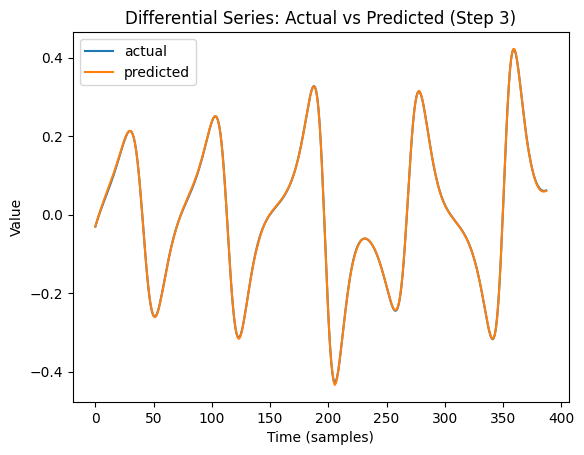

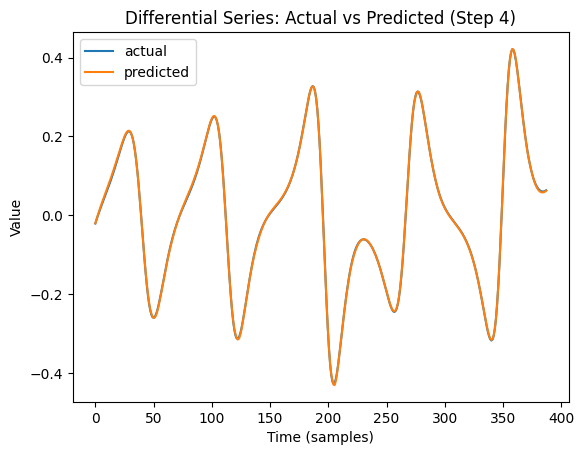

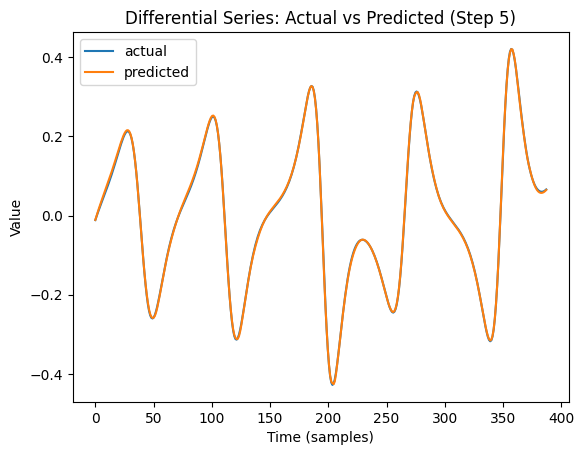

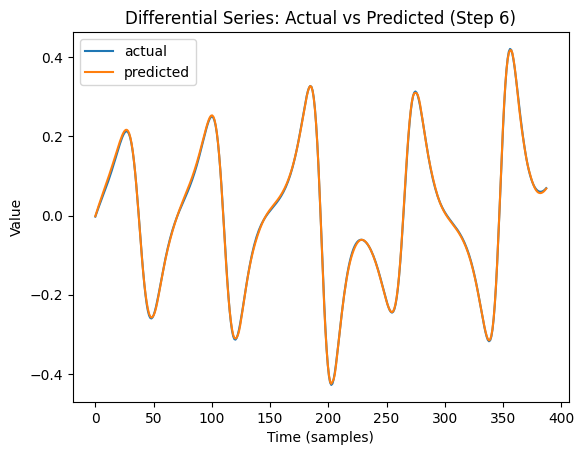

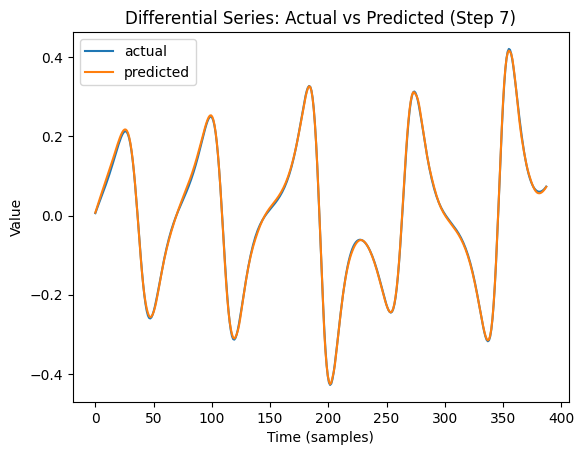

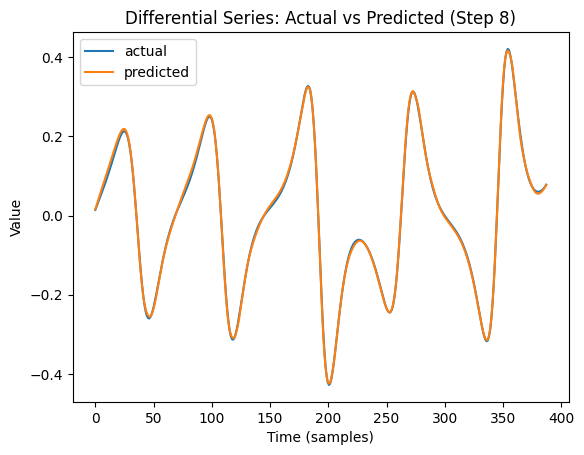

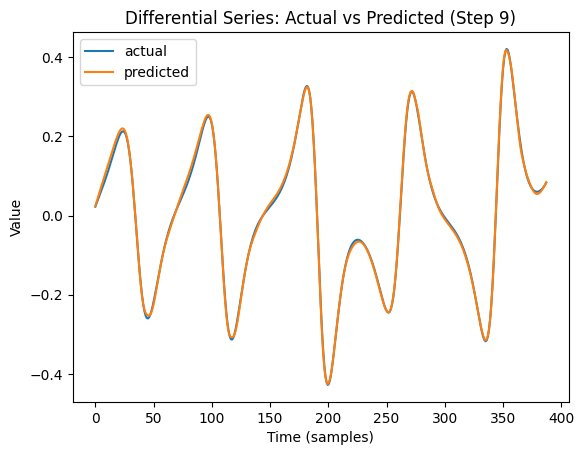

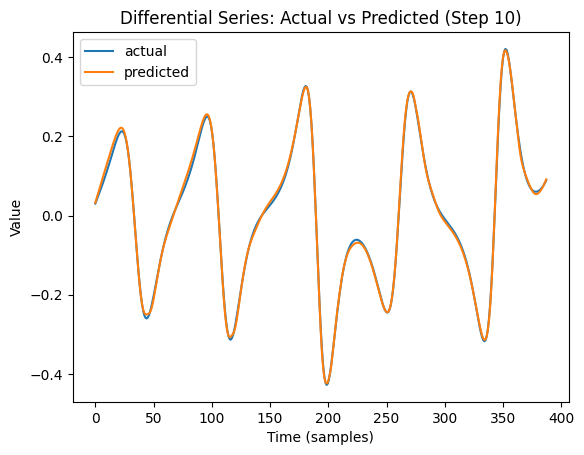

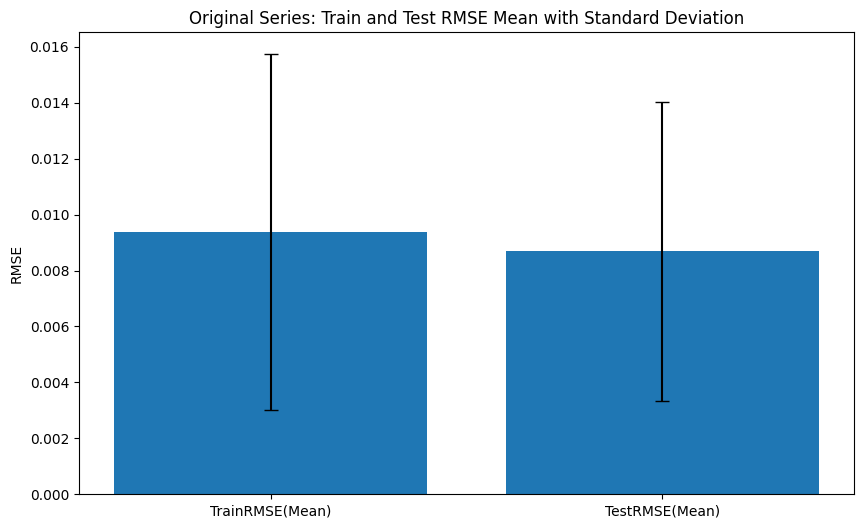

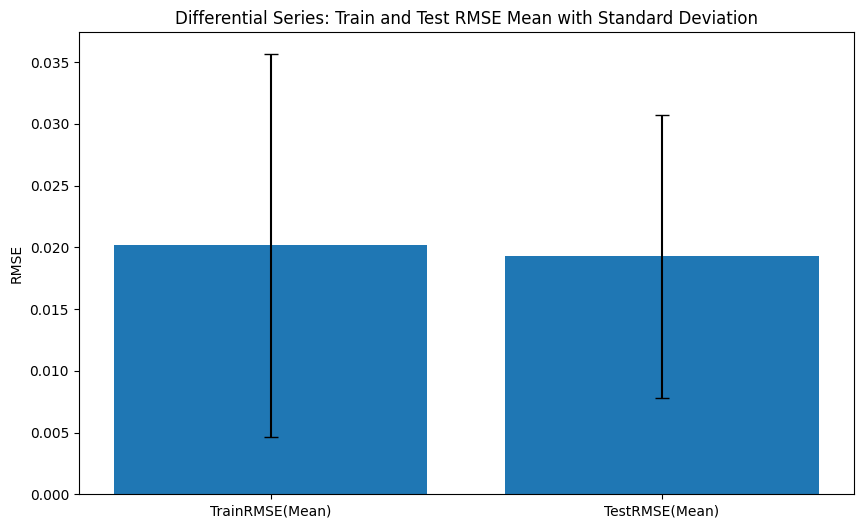

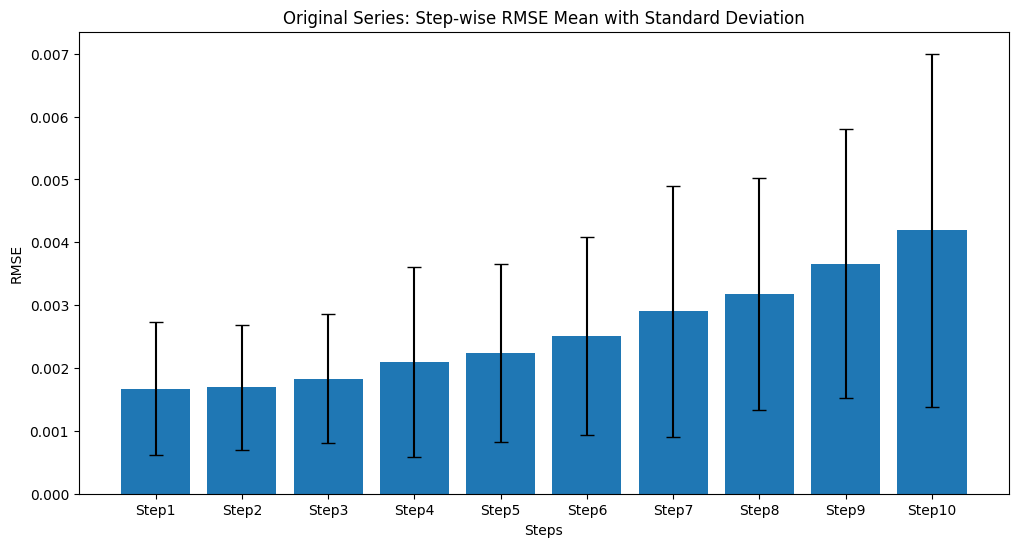

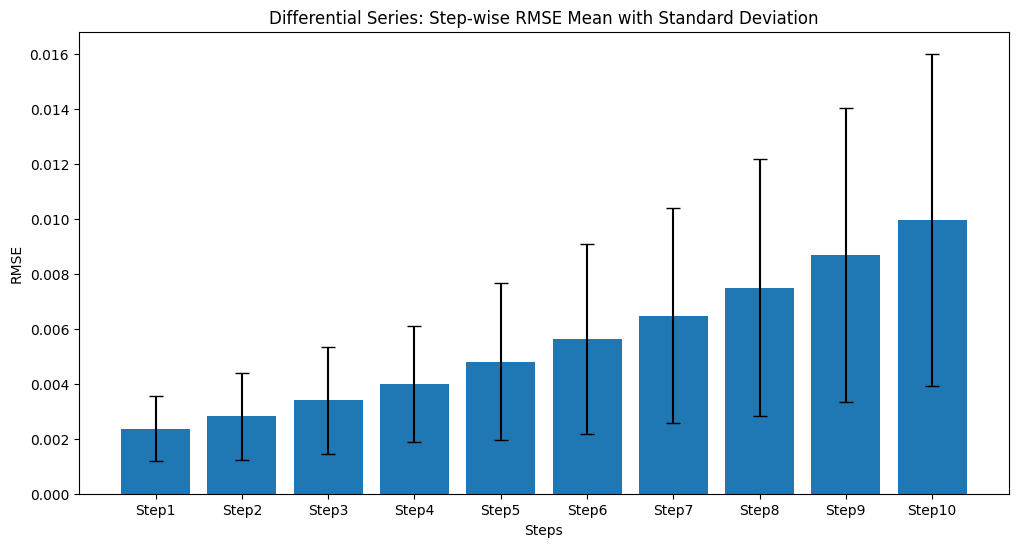

In [22]:
# Complete process
def analyze_and_visualize_results(train_acc_original, test_acc_original, Step_RMSE_original,
                                  train_acc_diff, test_acc_diff, Step_RMSE_diff,
                                  Best_Predict_Test, y_test_original, y_test_diff,
                                  Num_Exp, n_steps_out, name):

    # Prepare and save results
    arr_original_df, arr_diff_df = prepare_and_save_results(
        train_acc_original, test_acc_original, Step_RMSE_original,
        train_acc_diff, test_acc_diff, Step_RMSE_diff,
        Num_Exp, n_steps_out, name
    )

    # Calculate and save statistics
    stats_original_df, stats_diff_df = calculate_and_save_statistics(
        arr_original_df, arr_diff_df,
        train_acc_original, test_acc_original,
        train_acc_diff, test_acc_diff,
        Step_RMSE_original, Step_RMSE_diff,
        Num_Exp, n_steps_out, name
    )

    # Plot actual vs predicted values
    plot_actual_vs_predicted(Best_Predict_Test, Y_test_original, Y_test_diff, n_steps_out, name)

    # Plot RMSE mean and step-wise RMSE mean
    plot_rmse_means(stats_original_df, stats_diff_df, n_steps_out, name)

# Example usage:
analyze_and_visualize_results(train_acc_original, test_acc_original, Step_RMSE_original,
                              train_acc_diff, test_acc_diff, Step_RMSE_diff,
                              Best_Predict_Test, Y_test_original, Y_test_diff,
                              Num_Exp=30, n_steps_out=10, name="Lorenz_series")

In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import requests

def download_file_from_github(url, local_filename):
    # Send a GET request to the specified URL
    response = requests.get(url)

    # Raise an error if the request was not successful
    response.raise_for_status()

    # Save the content to a local file
    with open(local_filename, 'wb') as file:
        file.write(response.content)

    return local_filename

# URLs to your GitHub files (raw file links)
# unscaled_url = 'https://raw.githubusercontent.com/sydney-machine-learning/deeplearning_timeseries/master/data/Mackey/mackey.dat'
scaled_url = 'https://raw.githubusercontent.com/sydney-machine-learning/deeplearning_timeseries/refs/heads/master/data/Rossler/scaled_dataset.txt'

# Download the files locally
# unscaled_file = download_file_from_github(unscaled_url, 'unscaled_file.dat')
scaled_file = download_file_from_github(scaled_url, 'scaled_file.txt')

# Load the datasets
# unscaled_data = np.loadtxt(unscaled_file, max_rows = 1000)
scaled_data = np.loadtxt(scaled_file)

np.size(scaled_data)

1000

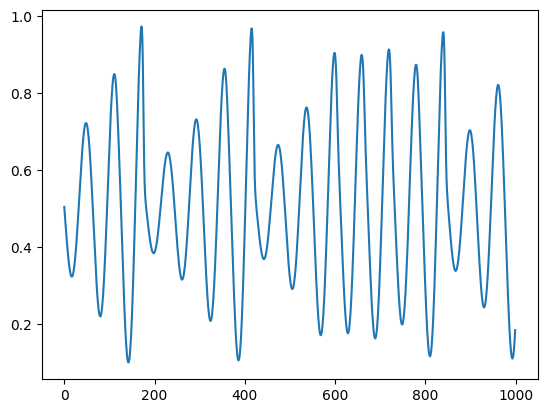

In [24]:
plt.plot(scaled_data)

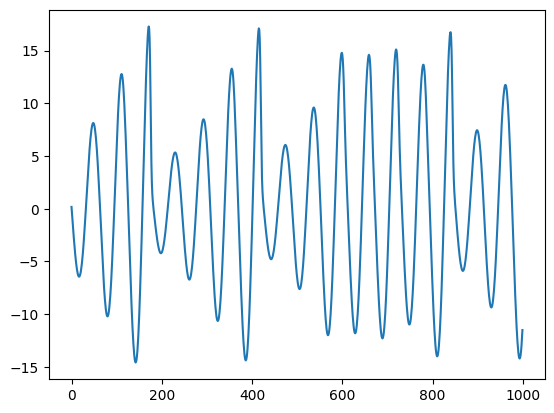

In [25]:
unscaled_url = 'https://raw.githubusercontent.com/sydney-machine-learning/deeplearning_timeseries/refs/heads/master/data/Rossler/rossler.dat'

unscaled_file = download_file_from_github(unscaled_url, 'unscaled_file.dat')

unscaled_data = np.loadtxt(unscaled_file, max_rows = 1000)

plt.plot(unscaled_data)

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Rossler system
a = 0.15
b = 0.20
c = 10.0

# Rossler system of equations
def rossler_equations(x, y, z):
    dxdt = -z - y
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return dxdt, dydt, dzdt

def rk4_step(x, y, z, dt):
    # k1
    dx1, dy1, dz1 = rossler_equations(x, y, z)
    k1x = dx1 * dt
    k1y = dy1 * dt
    k1z = dz1 * dt

    # k2
    dx2, dy2, dz2 = rossler_equations(x + 0.5*k1x, y + 0.5*k1y, z + 0.5*k1z)
    k2x = dx2 * dt
    k2y = dy2 * dt
    k2z = dz2 * dt

    # k3
    dx3, dy3, dz3 = rossler_equations(x + 0.5*k2x, y + 0.5*k2y, z + 0.5*k2z)
    k3x = dx3 * dt
    k3y = dy3 * dt
    k3z = dz3 * dt

    # k4
    dx4, dy4, dz4 = rossler_equations(x + k3x, y + k3y, z + k3z)
    k4x = dx4 * dt
    k4y = dy4 * dt
    k4z = dz4 * dt

    # Combine
    x_new = x + (k1x + 2*k2x + 2*k3x + k4x)/6.0
    y_new = y + (k1y + 2*k2y + 2*k3y + k4y)/6.0
    z_new = z + (k1z + 2*k2z + 2*k3z + k4z)/6.0

    return x_new, y_new, z_new

# Simulation parameters
dt = 0.1
t_max = 300.0
steps = int(t_max/dt)

# Initial conditions
x = 1.0
y = 1.0
z = 1.0

# Arrays to store results
t_values = np.zeros(steps+1)
x_values = np.zeros(steps+1)
y_values = np.zeros(steps+1)
z_values = np.zeros(steps+1)
dx_values = np.zeros(steps+1)

x_values[0] = x
y_values[0] = y
z_values[0] = z

# Perform the integration
for i in range(steps):
    # Compute dx/dt at current step for plotting purposes
    dxdt, _, _ = rossler_equations(x, y, z)
    dx_values[i] = dxdt

    x, y, z = rk4_step(x, y, z, dt)
    x_values[i+1] = x
    y_values[i+1] = y
    z_values[i+1] = z
    t_values[i+1] = t_values[i] + dt

# Compute dx/dt for the last step
dxdt, _, _ = rossler_equations(x, y, z)
dx_values[-1] = dxdt


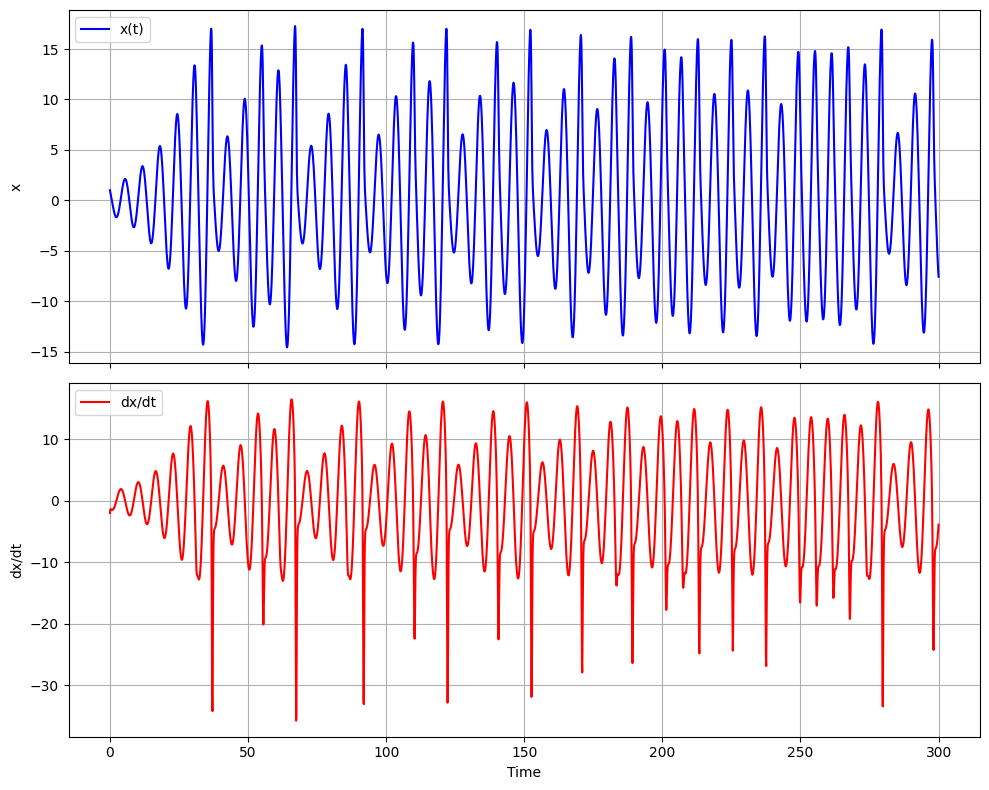

In [27]:
# Plot results
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax[0].plot(t_values, x_values, label='x(t)', color='blue')
ax[0].set_ylabel('x')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(t_values, dx_values, label='dx/dt', color='red')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('dx/dt')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

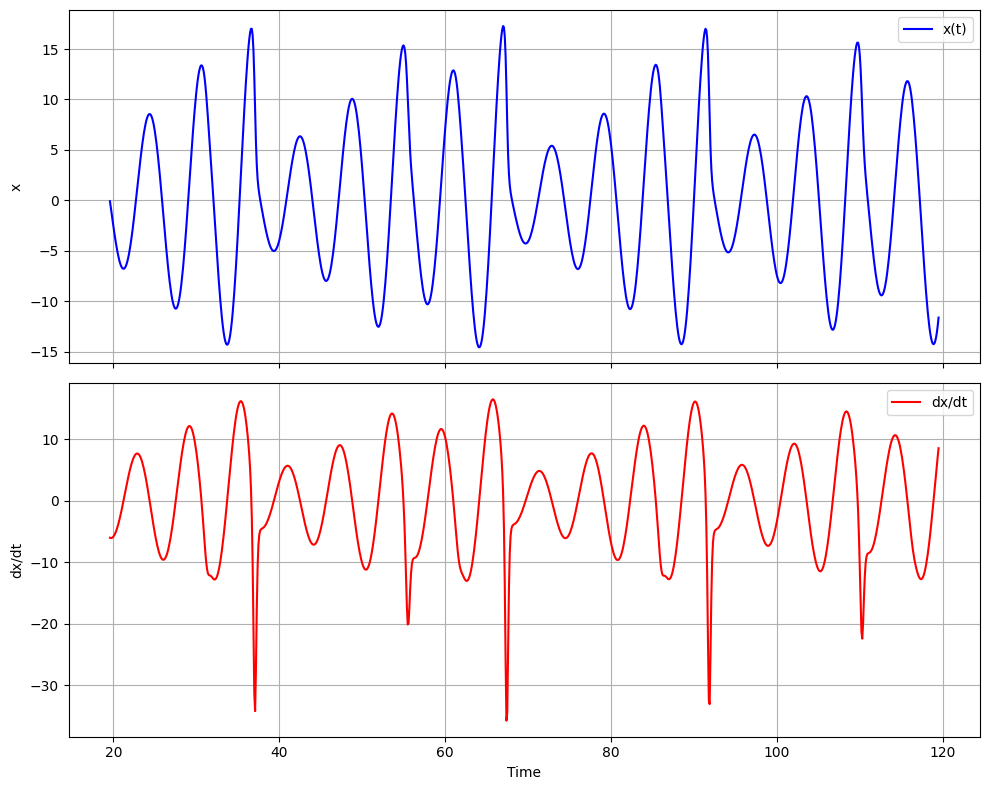

In [28]:
# Find zero-crossings of x
zero_crossings = []
for i in range(1, len(x_values)):
    # A zero crossing occurs if x changes sign between x[i-1] and x[i]
    if x_values[i-1] * x_values[i] < 0:
        zero_crossings.append(i)

if len(zero_crossings) < 7:
    print("Less than seven zero crossings found in the given time range.")
else:
    # Get the index of the second zero crossing
    seventh_zero_idx = zero_crossings[6]

    # We want 100 points from the second zero crossing
    end_idx = seventh_zero_idx + 1000
    if end_idx > len(x_values):
        end_idx = len(x_values)

    # Extract the segment
    t_segment = t_values[seventh_zero_idx:end_idx]
    x_segment = x_values[seventh_zero_idx:end_idx]
    dx_segment = dx_values[seventh_zero_idx:end_idx]

    # Plot the extracted data
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    ax1.plot(t_segment, x_segment, label='x(t)', color='blue')
    ax1.set_ylabel('x')
    ax1.grid(True)
    ax1.legend()

    ax2.plot(t_segment, dx_segment, label='dx/dt', color='red')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('dx/dt')
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [29]:
# Ensure x_segment and dx_segment are NumPy arrays
x_segment = np.array(x_segment)
dx_segment = np.array(dx_segment)

# Reshape to 2D since MinMaxScaler expects (n_samples, n_features)
x_segment_2d = x_segment.reshape(-1, 1)
dx_segment_2d = dx_segment.reshape(-1, 1)

scaler_original = MinMaxScaler(feature_range=(-0.5, 0.5))  # For original series
scaler_diff = MinMaxScaler(feature_range=(-0.5, 0.5))     # For differential series

# Fit the scalers on the reshaped data
scaler_original.fit(x_segment_2d)
scaler_diff.fit(dx_segment_2d)

# Transform the data
scaled_original_correct_2d = scaler_original.transform(x_segment_2d)
scaled_diff_correct_2d = scaler_diff.transform(dx_segment_2d)

# Optionally flatten back to 1D arrays if preferred
scaled_original_correct = scaled_original_correct_2d.flatten()
scaled_diff_correct = scaled_diff_correct_2d.flatten()

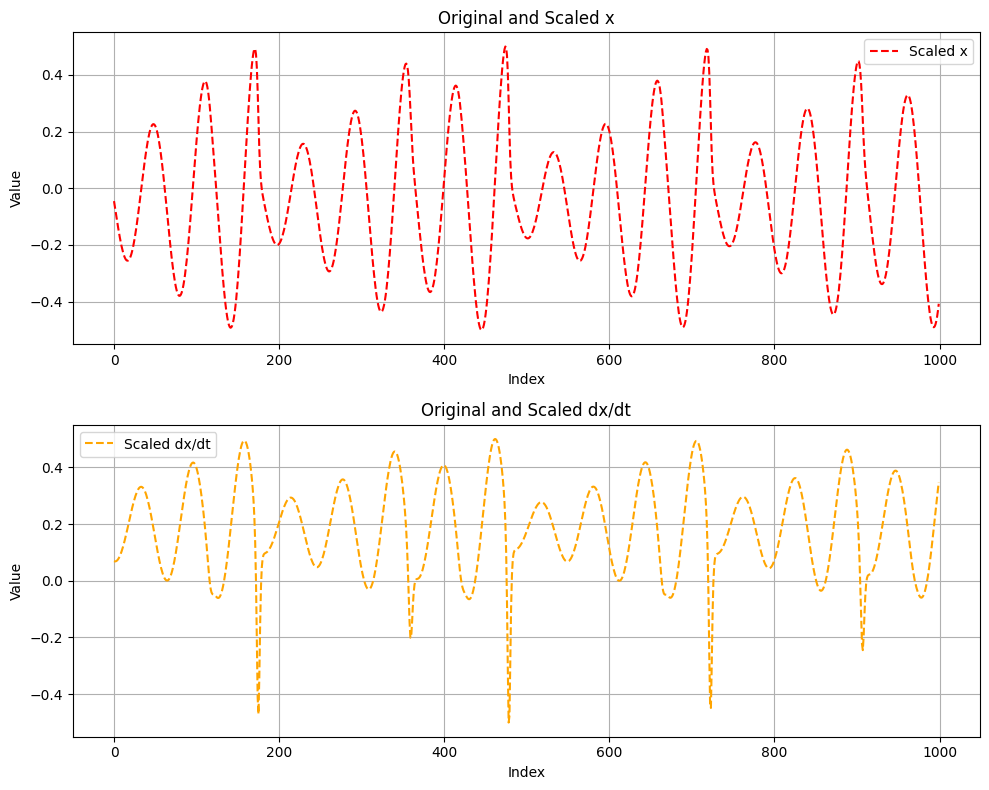

In [30]:
import matplotlib.pyplot as plt
import numpy as np

x_segment = np.array(x_segment)
dx_segment = np.array(dx_segment)
scaled_original_correct = np.array(scaled_original_correct)
scaled_diff_correct = np.array(scaled_diff_correct)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot original vs scaled for x_segment
# ax1.plot(x_segment, label='Original x', color='blue')
ax1.plot(scaled_original_correct, label='Scaled x', color='red', linestyle='--')
ax1.set_title('Original and Scaled x')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')
ax1.grid(True)
ax1.legend()

# Plot original vs scaled for dx_segment
# ax2.plot(dx_segment, label='Original dx/dt', color='green')
ax2.plot(scaled_diff_correct, label='Scaled dx/dt', color='orange', linestyle='--')
ax2.set_title('Original and Scaled dx/dt')
ax2.set_xlabel('Index')
ax2.set_ylabel('Value')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


In [31]:
# Recalculate the exact minimum length across all series for proper alignment
min_length_input = len(scaled_data) - 10  # Adjusting based on the offset needed for inputs
min_length_output = len(scaled_data) - 15  # Further reduced for outputs to align properly

# Use the smaller of the two lengths to ensure all columns align
final_consistent_length = min(min_length_input, min_length_output)

# Initialize a new DataFrame for the corrected output
formatted_df_corrected_final = pd.DataFrame()

# Add the first five columns as Input1...Input5 using scaled_data
for i in range(5):
    formatted_df_corrected_final[f'Input{i+1}'] = scaled_original_correct[i:final_consistent_length + i].flatten()

# Add the next four columns as Input_Differential1...Input_Differential4 using differential_scaled
for i in range(4):
    formatted_df_corrected_final[f'Input_Differential{i+1}'] = scaled_diff_correct[i:final_consistent_length + i].flatten()

# Add the next ten columns as Output1...Output10 using scaled_data
for i in range(10):
    formatted_df_corrected_final[f'Output{i+1}'] = scaled_original_correct[(i + 5):(final_consistent_length + i + 5)].flatten()

# Add the next nine columns as Output_Differential1...Output_Differential9 using differential_scaled
for i in range(10):
    formatted_df_corrected_final[f'Output_Differential{i+1}'] = scaled_diff_correct[(i + 4):(final_consistent_length + i + 4)].flatten()

# Ensure all columns have the same length by truncating to the smallest consistent length
formatted_df_corrected_final = formatted_df_corrected_final.iloc[12:final_consistent_length]
formatted_df_corrected_final_Rossler = formatted_df_corrected_final.reset_index(drop=True)

formatted_df_corrected_final_Rossler.tail(10)

Input1    Input2    Input3    Input4    Input5  Input_Differential1  \
963  0.013114 -0.025879 -0.065563 -0.105580 -0.145547            -0.050425   
964 -0.025879 -0.065563 -0.105580 -0.145547 -0.185071            -0.055648   
965 -0.065563 -0.105580 -0.145547 -0.185071 -0.223749            -0.058796   
966 -0.105580 -0.145547 -0.185071 -0.223749 -0.261180            -0.059681   
967 -0.145547 -0.185071 -0.223749 -0.261180 -0.296971            -0.058186   
968 -0.185071 -0.223749 -0.261180 -0.296971 -0.330737            -0.054255   
969 -0.223749 -0.261180 -0.296971 -0.330737 -0.362107            -0.047875   
970 -0.261180 -0.296971 -0.330737 -0.362107 -0.390730            -0.039066   
971 -0.296971 -0.330737 -0.362107 -0.390730 -0.416277            -0.027877   
972 -0.330737 -0.362107 -0.390730 -0.416277 -0.438444            -0.014385   

     Input_Differential2  Input_Differential3  Input_Differential4   Output1  \
963            -0.055648            -0.058796            -0.059681 -0.185071   
964            -0.058796            -0.059681            -0.058186 -0.223749   
965            -0.059681            -0.058186            -0.054255 -0.261180   
966            -0.058186            -0.054255            -0.047875 -0.296971   
967            -0.054255            -0.047875            -0.039066 -0.330737   
968            -0.047875            -0.039066            -0.027877 -0.362107   
969            -0.039066            -0.027877            -0.014385 -0.390730   
970            -0.027877            -0.014385             0.001312 -0.416277   
971            -0.014385             0.001312             0.019087 -0.438444   
972             0.001312             0.019087             0.038796 -0.456958   

     ...  Output_Differential1  Output_Differential2  Output_Differential3  \
963  ...             -0.058186             -0.054255             -0.047875   
964  ...             -0.054255             -0.047875             -0.039066   
965  ...             -0.047875             -0.039066             -0.027877   
966  ...             -0.039066             -0.027877             -0.014385   
967  ...             -0.027877             -0.014385              0.001312   
968  ...             -0.014385              0.001312              0.019087   
969  ...              0.001312              0.019087              0.038796   
970  ...              0.019087              0.038796              0.060268   
971  ...              0.038796              0.060268              0.083314   
972  ...              0.060268              0.083314              0.107726   

     Output_Differential4  Output_Differential5  Output_Differential6  \
963             -0.039066             -0.027877             -0.014385   
964             -0.027877             -0.014385              0.001312   
965             -0.014385              0.001312              0.019087   
966              0.001312              0.019087              0.038796   
967              0.019087              0.038796              0.060268   
968              0.038796              0.060268              0.083314   
969              0.060268              0.083314              0.107726   
970              0.083314              0.107726              0.133279   
971              0.107726              0.133279              0.159734   
972              0.133279              0.159734              0.186837   

     Output_Differential7  Output_Differential8  Output_Differential9  \
963              0.001312              0.019087              0.038796   
964              0.019087              0.038796              0.060268   
965              0.038796              0.060268              0.083314   
966              0.060268              0.083314              0.107726   
967              0.083314              0.107726              0.133279   
968              0.107726              0.133279              0.159734   
969              0.133279              0.159734              0.186837   
970              0.1

In [32]:
# Step 1: Create the Training DataFrame (First 580 Rows)
train_data_scaled_Rossler_final = formatted_df_corrected_final_Rossler.iloc[:586].reset_index(drop=True)

# Step 2: Create the Testing DataFrame (Remaining Rows)
test_data_scaled_Rossler_final = formatted_df_corrected_final_Rossler.iloc[586:].reset_index(drop=True)

# Step 3: Create the Testing DataFrame Without Output and Output Differential Columns
# Drop the Output and Output_Differential columns
columns_to_drop = [col for col in formatted_df_corrected_final_Rossler.columns if 'Output' in col]
test_data_scaled_without_output = test_data_scaled_Rossler_final.drop(columns=columns_to_drop).reset_index(drop=True)

# train_unscaled_df.head(20)
# test_unscaled_df.tail(5)
test_data_scaled_without_output.tail(5)

Input1    Input2    Input3    Input4    Input5  Input_Differential1  \
382 -0.185071 -0.223749 -0.261180 -0.296971 -0.330737            -0.054255   
383 -0.223749 -0.261180 -0.296971 -0.330737 -0.362107            -0.047875   
384 -0.261180 -0.296971 -0.330737 -0.362107 -0.390730            -0.039066   
385 -0.296971 -0.330737 -0.362107 -0.390730 -0.416277            -0.027877   
386 -0.330737 -0.362107 -0.390730 -0.416277 -0.438444            -0.014385   

     Input_Differential2  Input_Differential3  Input_Differential4  
382            -0.047875            -0.039066            -0.027877  
383            -0.039066            -0.027877            -0.014385  
384            -0.027877            -0.014385             0.001312  
385            -0.014385             0.001312             0.019087  
386             0.001312             0.019087             0.038796

In [33]:
train_df = train_data_scaled_Rossler_final
test_df = test_data_scaled_Rossler_final

# Display the first few rows of the datasets to understand their structure
train_df.head(), test_df.head()

(     Input1    Input2    Input3    Input4    Input5  Input_Differential1  \
 0 -0.236113 -0.243868 -0.249711 -0.253554 -0.255328             0.131632   
 1 -0.243868 -0.249711 -0.253554 -0.255328 -0.254984             0.142989   
 2 -0.249711 -0.253554 -0.255328 -0.254984 -0.252494             0.154935   
 3 -0.253554 -0.255328 -0.254984 -0.252494 -0.247850             0.167358   
 4 -0.255328 -0.254984 -0.252494 -0.247850 -0.241068             0.180141   
 
    Input_Differential2  Input_Differential3  Input_Differential4   Output1  \
 0             0.142989             0.154935             0.167358 -0.254984   
 1             0.154935             0.167358             0.180141 -0.252494   
 2             0.167358             0.180141             0.193161 -0.247850   
 3             0.180141             0.193161             0.206290 -0.241068   
 4             0.193161             0.206290             0.219397 -0.232182   
 
    ...  Output_Differential1  Output_Differential2  Output_

In [34]:
# Extracting inputs and outputs for training
X_train_original = train_df[['Input1', 'Input2', 'Input3', 'Input4', 'Input5']].values.reshape(-1, 5, 1)
X_train_diff = train_df[['Input_Differential1', 'Input_Differential2', 'Input_Differential3', 'Input_Differential4']].values.reshape(-1, 4, 1)

# Outputs
# Identify the output columns (assuming they are named Output1, Output2, ..., Output10)
output_columns = [f'Output{i+1}' for i in range(10)]

# Extract Y_train for original outputs using the identified columns
Y_train_original = train_df[output_columns].values
Y_train_diff = train_df[[col for col in train_df.columns if 'Output_Differential' in col]].values

# Reshape the test data in the same way
X_test_original = test_df[['Input1', 'Input2', 'Input3', 'Input4', 'Input5']].values.reshape(-1, 5, 1)
X_test_diff = test_df[['Input_Differential1', 'Input_Differential2', 'Input_Differential3', 'Input_Differential4']].values.reshape(-1, 4, 1)

# Extract the test ground truth outputs (original and differential)
Y_test_original = test_df[['Output1', 'Output2', 'Output3', 'Output4', 'Output5',
                                       'Output6', 'Output7', 'Output8', 'Output9', 'Output10']].values
Y_test_diff = test_df[[col for col in test_df.columns if 'Output_Differential' in col]].values

# Confirming the shapes
X_train_original.shape, X_train_diff.shape, Y_train_original.shape, Y_train_diff.shape, X_test_original.shape, X_test_diff.shape, Y_test_original.shape, Y_test_diff.shape

((586, 5, 1),
 (586, 4, 1),
 (586, 10),
 (586, 10),
 (387, 5, 1),
 (387, 4, 1),
 (387, 10),
 (387, 10))

In [35]:
import tensorflow as tf

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version: ", tf.__version__)

# Print details of the GPU if available
gpu_devices = tf.config.list_physical_devices('GPU')
for gpu in gpu_devices:
    print(gpu)

Num GPUs Available:  1
TensorFlow version:  2.18.0
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [36]:
# ************Using Custom Loss Functions*********
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate
from tensorflow.keras.models import Model
import numpy as np
import time

def rmse(y_true, y_pred):
    error = np.subtract(y_pred, y_true)
    sqerror = np.sum(np.square(error)) / y_true.shape[0]
    return np.sqrt(sqerror)

def MODEL_twin_LSTM(x_train_original, x_train_diff, x_test_original, x_test_diff,
                    y_train_original, y_train_diff, y_test_original, y_test_diff,
                    Num_Exp, n_steps_in, n_steps_out, Epochs, Hidden):
    n_features = 1

    # Reshape the data for LSTM input
    x_train_original = x_train_original.reshape((x_train_original.shape[0], x_train_original.shape[1], n_features))
    x_train_diff = x_train_diff.reshape((x_train_diff.shape[0], x_train_diff.shape[1], n_features))
    x_test_original = x_test_original.reshape((x_test_original.shape[0], x_test_original.shape[1], n_features))
    x_test_diff = x_test_diff.reshape((x_test_diff.shape[0], x_test_diff.shape[1], n_features))

    # Initialize arrays to store results from experiments
    train_acc_original = np.zeros(Num_Exp)
    train_acc_diff = np.zeros(Num_Exp)
    test_acc_original = np.zeros(Num_Exp)
    test_acc_diff = np.zeros(Num_Exp)
    Step_RMSE_original = np.zeros([Num_Exp, n_steps_out])
    Step_RMSE_diff = np.zeros([Num_Exp, n_steps_out])

    Best_RMSE = 1000000  # Assigning a large initial number

    # Define the model outside the loop (reusing the model across experiments)
    input_original = Input(shape=(n_steps_in, n_features), name='input_original')
    input_diff = Input(shape=(n_steps_in - 1, n_features), name='input_diff')

    # Shared LSTM layer
    shared_lstm = LSTM(units=Hidden, activation='tanh', return_sequences=False, name='shared_lstm')

    # Process inputs through the shared LSTM layer
    original_lstm_output = shared_lstm(input_original)
    diff_lstm_output = shared_lstm(input_diff)

    # Concatenate the LSTM outputs
    combined_output = Concatenate()([original_lstm_output, diff_lstm_output])

    # Predict outputs using the combined LSTM outputs
    output_original = Dense(units=n_steps_out, activation='linear', name='output_original')(combined_output)
    output_diff = Dense(units=n_steps_out, activation='linear', name='output_diff')(combined_output)

    # Define the model
    model = Model(inputs=[input_original, input_diff], outputs=[output_original, output_diff])

    # Define the optimizer outside the loop
    optimizer = tf.keras.optimizers.Adam()

    # Define custom loss functions for each output
    def custom_loss_original(y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred))

    def custom_loss_diff(y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred))

    # Assign custom losses to each output
    losses = {
        'output_original': custom_loss_original,
        'output_diff': custom_loss_diff
    }

    # Optionally, assign loss weights
    loss_weights = {
        'output_original': 500,
        'output_diff': 500
    }

    # Compile the model once before the loop using custom loss functions
    model.compile(optimizer=optimizer, loss=losses, loss_weights=loss_weights)

    # Print model summary to ensure architecture is correct
    model.summary()

    start_time = time.time()
    for run in range(Num_Exp):
        print(f"Experiment {run + 1} in progress")

        # Train the model
        history = model.fit(
            x=[x_train_original, x_train_diff],
            y=[y_train_original, y_train_diff],
            epochs=Epochs,
            batch_size=32,
            verbose=0,
            shuffle=False
        )

        # Print loss after training
        final_loss = history.history['loss'][-1]
        print(f"Final loss for experiment {run + 1}: {final_loss}")

        # Predict on training and testing sets
        y_predicttrain_original, y_predicttrain_diff = model.predict([x_train_original, x_train_diff])
        y_predicttest_original, y_predicttest_diff = model.predict([x_test_original, x_test_diff])

        # Calculate RMSE for training and test sets (both original and differential)
        train_acc_original[run] = rmse(y_train_original, y_predicttrain_original)
        train_acc_diff[run] = rmse(y_train_diff, y_predicttrain_diff)
        test_acc_original[run] = rmse(y_test_original, y_predicttest_original)
        test_acc_diff[run] = rmse(y_test_diff, y_predicttest_diff)

        # Update the best RMSE and save the best predictions
        if test_acc_original[run] < Best_RMSE:
            Best_RMSE = test_acc_original[run]
            Best_Predict_Test = [y_predicttest_original, y_predicttest_diff]

        # Calculate RMSE for each step in the predicted sequence on the test data
        for j in range(n_steps_out):
            Step_RMSE_original[run][j] = rmse(y_test_original[:, j], y_predicttest_original[:, j])
            Step_RMSE_diff[run][j] = rmse(y_test_diff[:, j], y_predicttest_diff[:, j])

    print("Total time for", Num_Exp, "experiments:", time.time() - start_time)
    return train_acc_original, train_acc_diff, test_acc_original, test_acc_diff, Step_RMSE_original, Step_RMSE_diff, Best_Predict_Test

# Example usage of the function
train_acc_original, train_acc_diff, test_acc_original, test_acc_diff, Step_RMSE_original, Step_RMSE_diff, Best_Predict_Test = MODEL_twin_LSTM(
    x_train_original=X_train_original,
    x_train_diff=X_train_diff,
    x_test_original=X_test_original,
    x_test_diff=X_test_diff,
    y_train_original=Y_train_original,
    y_train_diff=Y_train_diff,
    y_test_original=Y_test_original,
    y_test_diff=Y_test_diff,
    Num_Exp=30,
    n_steps_in=5,
    n_steps_out=10,
    Epochs=1000,  # Consider reducing epochs to prevent overfitting
    Hidden=10
)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_original            │ (None, 5, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_diff (InputLayer)   │ (None, 4, 1)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ shared_lstm (LSTM)        │ (None, 10)             │            480 │ input_original[0][0],  │
│                           │                        │                │ input_diff[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 20)             │              0 │ shared_lstm[0][0],     │
│ (Concatenate)             │                        │                │ shared_lstm[1][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_original (Dense)   │ (None, 10)             │            210 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_diff (Dense)       │ (None, 10)             │            210 │ concatenate_1[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 900 (3.52 KB)

 Trainable params: 900 (3.52 KB)

 Non-trainable params: 0 (0.00 B)

Experiment 1 in progress
Final loss for experiment 1: 0.2989614009857178
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Experiment 2 in progress
Final loss for experiment 2: 0.18981516361236572
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Experiment 3 in progress
Final loss for experiment 3: 0.13885073363780975
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Experiment 4 in progress
Final loss for experiment 4: 0.10632506757974625
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Experiment 5 in progress
Final loss for experiment 5: 0.08088820427656174
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Experiment 6 in progress
Final loss for experiment 6: 0.06264426559209824
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Experiment 7 in progress
Final loss for experiment 7: 0.04847974702715874
19/

In [37]:
import numpy as np
import pandas as pd

def prepare_and_save_results(train_acc_original, test_acc_original, Step_RMSE_original,
                             train_acc_diff, test_acc_diff, Step_RMSE_diff,
                             Num_Exp, n_steps_out, name):

    # Combine results for tabular display for original series
    arr_original = np.dstack((train_acc_original, test_acc_original))
    arr_original = arr_original.reshape(Num_Exp, 2)
    arr_original = np.concatenate((arr_original, Step_RMSE_original), axis=1)
    arr_original = arr_original.reshape(Num_Exp, 2 + n_steps_out)

    # Combine results for tabular display for differential series
    arr_diff = np.dstack((train_acc_diff, test_acc_diff))
    arr_diff = arr_diff.reshape(Num_Exp, 2)
    arr_diff = np.concatenate((arr_diff, Step_RMSE_diff), axis=1)
    arr_diff = arr_diff.reshape(Num_Exp, 2 + n_steps_out)

    ExpIndex = np.array(["Exp" + str(j + 1) for j in range(Num_Exp)])
    ExpIndex1 = ['TrainRMSE', 'TestRMSE'] + ["Step" + str(j + 1) for j in range(n_steps_out)]

    arr_original_df = pd.DataFrame(np.round_(arr_original, decimals=5), index=ExpIndex, columns=ExpIndex1)
    arr_diff_df = pd.DataFrame(np.round_(arr_diff, decimals=5), index=ExpIndex, columns=ExpIndex1)

    print("Original Series Results:")
    print(arr_original_df)
    print("\nDifferential Series Results:")
    print(arr_diff_df)

    # # Save to CSV
    # arr_original_df.to_csv(f"Results/{name}/ExpAnalysis_Original.csv")
    # arr_diff_df.to_csv(f"Results/{name}/ExpAnalysis_Differential.csv")

    return arr_original_df, arr_diff_df

In [38]:
def calculate_and_save_statistics(arr_original_df, arr_diff_df, train_acc_original, test_acc_original,
                                  train_acc_diff, test_acc_diff, Step_RMSE_original, Step_RMSE_diff,
                                  Num_Exp, n_steps_out, name):

    # Function to calculate statistics for a given array
    def calculate_statistics(train_acc, test_acc, Step_RMSE, n_steps_out, Num_Exp):
        Train_Mean = np.mean(train_acc)
        Train_Std = np.std(train_acc)
        Train_CI_LB = Train_Mean - 1.96 * (Train_Std / np.sqrt(Num_Exp))
        Train_CI_UB = Train_Mean + 1.96 * (Train_Std / np.sqrt(Num_Exp))

        Test_Mean = np.mean(test_acc)
        Test_Std = np.std(test_acc)
        Test_CI_LB = Test_Mean - 1.96 * (Test_Std / np.sqrt(Num_Exp))
        Test_CI_UB = Test_Mean + 1.96 * (Test_Std / np.sqrt(Num_Exp))

        arr1 = np.vstack((
            [Train_Mean, Train_Std, Train_CI_LB, Train_CI_UB, np.min(train_acc), np.max(train_acc)],
            [Test_Mean, Test_Std, Test_CI_LB, Test_CI_UB, np.min(test_acc), np.max(test_acc)]
        ))

        for j in range(n_steps_out):
            Step_mean = np.mean(Step_RMSE[:, j])
            Step_std = np.std(Step_RMSE[:, j])
            Step_min = np.min(Step_RMSE[:, j])
            Step_CI_LB = Step_mean - 1.96 * (Step_std / np.sqrt(Num_Exp))
            Step_CI_UB = Step_mean + 1.96 * (Step_std / np.sqrt(Num_Exp))
            arr1 = np.vstack((arr1, [Step_mean, Step_std, Step_CI_LB, Step_CI_UB, Step_min, np.max(Step_RMSE[:, j])]))

        return pd.DataFrame(np.round_(arr1, decimals=5), index=arr_original_df.columns,
                            columns=['Mean', 'Standard Deviation', 'CI_LB', 'CI_UB', 'Min', 'Max'])

    # Calculate statistics for original and differential series
    stats_original_df = calculate_statistics(train_acc_original, test_acc_original, Step_RMSE_original, n_steps_out, Num_Exp)
    stats_diff_df = calculate_statistics(train_acc_diff, test_acc_diff, Step_RMSE_diff, n_steps_out, Num_Exp)

    print("\nOriginal Series Summary:")
    print(stats_original_df)
    print("\nDifferential Series Summary:")
    print(stats_diff_df)

    # # Save to CSV
    # stats_original_df.to_csv(f"Results/{name}/OverallAnalysis_Original.csv")
    # stats_diff_df.to_csv(f"Results/{name}/OverallAnalysis_Differential.csv")

    return stats_original_df, stats_diff_df


In [39]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(Best_Predict_Test, y_test_original, y_test_diff, n_steps_out, name):

    # Plot actual vs predicted for original series
    x_data = np.linspace(0, y_test_original.shape[0], num=y_test_original.shape[0])
    for j in range(n_steps_out):
        plt.figure()
        plt.plot(x_data, y_test_original[:, j], label='actual')
        plt.plot(x_data, Best_Predict_Test[0][:, j], label='predicted')
        plt.ylabel('Value')
        plt.xlabel('Time (samples)')
        plt.title(f'Original Series: Actual vs Predicted (Step {j+1})')
        plt.legend()
        # plt.savefig(f"Results/{name}/pred_Step{j+1}_Original.png", dpi=300)
        plt.show()
        plt.close()

    # Plot actual vs predicted for differential series
    x_data = np.linspace(0, y_test_diff.shape[0], num=y_test_diff.shape[0])
    for j in range(n_steps_out):
        plt.figure()
        plt.plot(x_data, y_test_diff[:, j], label='actual')
        plt.plot(x_data, Best_Predict_Test[1][:, j], label='predicted')
        plt.ylabel('Value')
        plt.xlabel('Time (samples)')
        plt.title(f'Differential Series: Actual vs Predicted (Step {j+1})')
        plt.legend()
        # plt.savefig(f"Results/{name}/pred_Step{j+1}_Differential.png", dpi=300)
        plt.show()
        plt.close()

In [40]:
def plot_rmse_means(stats_original_df, stats_diff_df, n_steps_out, name):

    # Plot TrainRMSE and TestRMSE for original series
    plt.figure(figsize=(10, 6))
    plt.bar(['TrainRMSE(Mean)', 'TestRMSE(Mean)'],
            stats_original_df['Mean'][:2], yerr=stats_original_df['Standard Deviation'][:2], capsize=5)
    plt.title('Original Series: Train and Test RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    # plt.savefig(f"Results/{name}/RMSE_Mean_Original.png", dpi=300)
    plt.show()

    # Plot TrainRMSE and TestRMSE for differential series
    plt.figure(figsize=(10, 6))
    plt.bar(['TrainRMSE(Mean)', 'TestRMSE(Mean)'],
            stats_diff_df['Mean'][:2], yerr=stats_diff_df['Standard Deviation'][:2], capsize=5)
    plt.title('Differential Series: Train and Test RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    # plt.savefig(f"Results/{name}/RMSE_Mean_Differential.png", dpi=300)
    plt.show()

    # Plot Step-wise RMSE Mean for original series
    plt.figure(figsize=(12, 6))
    plt.bar([f'Step{j+1}' for j in range(n_steps_out)],
            stats_original_df['Mean'][2:], yerr=stats_original_df['Standard Deviation'][2:], capsize=5)
    plt.title('Original Series: Step-wise RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    plt.xlabel('Steps')
    # plt.savefig(f"Results/{name}/Step_RMSE_Mean_Original.png", dpi=300)
    plt.show()

    # Plot Step-wise RMSE Mean for differential series
    plt.figure(figsize=(12, 6))
    plt.bar([f'Step{j+1}' for j in range(n_steps_out)],
            stats_diff_df['Mean'][2:], yerr=stats_diff_df['Standard Deviation'][2:], capsize=5)
    plt.title('Differential Series: Step-wise RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    plt.xlabel('Steps')
    # plt.savefig(f"Results/{name}/Step_RMSE_Mean_Differential.png", dpi=300)
    plt.show()

Original Series Results:
       TrainRMSE  TestRMSE    Step1    Step2    Step3    Step4    Step5  \
Exp1     0.03226   0.03243  0.00343  0.00340  0.00436  0.00636  0.00798   
Exp2     0.02684   0.02725  0.00230  0.00269  0.00359  0.00465  0.00563   
Exp3     0.02315   0.02415  0.00276  0.00318  0.00365  0.00439  0.00523   
Exp4     0.02099   0.02262  0.00255  0.00291  0.00356  0.00423  0.00500   
Exp5     0.01869   0.02064  0.00217  0.00240  0.00318  0.00400  0.00444   
Exp6     0.01646   0.01831  0.00216  0.00231  0.00293  0.00374  0.00414   
Exp7     0.01454   0.01627  0.00236  0.00236  0.00270  0.00333  0.00388   
Exp8     0.01241   0.01391  0.00228  0.00221  0.00235  0.00287  0.00346   
Exp9     0.01232   0.01367  0.00309  0.00308  0.00283  0.00268  0.00311   
Exp10    0.00945   0.01053  0.00152  0.00181  0.00198  0.00222  0.00266   
Exp11    0.00973   0.01071  0.00210  0.00237  0.00245  0.00250  0.00274   
Exp12    0.00969   0.01063  0.00176  0.00221  0.00245  0.00262  0.00290   


<ipython-input-41-935b0f47cacc>:8: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  arr_original_df, arr_diff_df = prepare_and_save_results(
<ipython-input-41-935b0f47cacc>:8: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  arr_original_df, arr_diff_df = prepare_and_save_results(
<ipython-input-38-3152937568f1>:34: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  stats_original_df = calculate_statistics(train_acc_original, test_acc_original, Step_RMSE_original, n_steps_out, Num_Exp)
<ipython-input-38-3152937568f1>:35: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  stats_diff_df = calculate_statistics(train_acc_diff, test_acc_diff, Step_RMSE_diff, n_steps_out, Num_Exp)


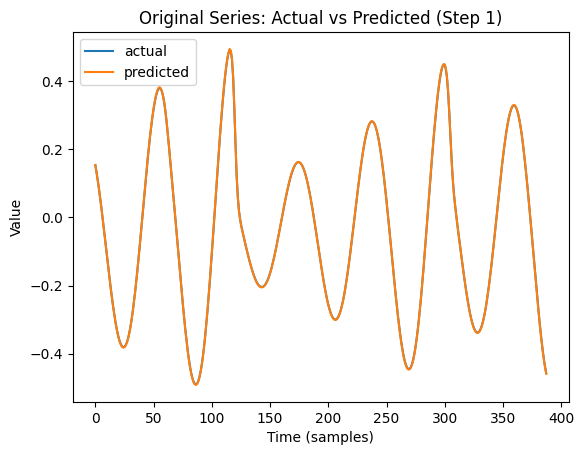

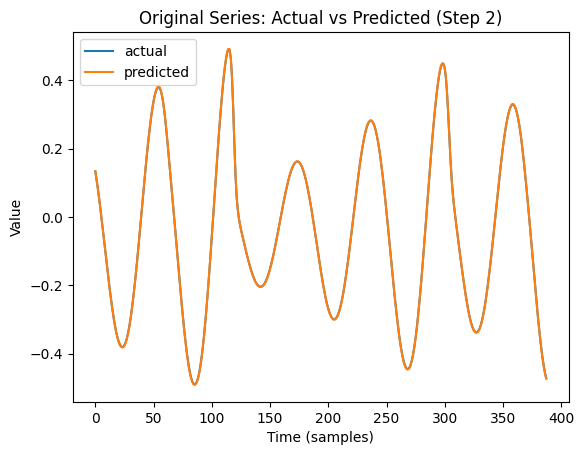

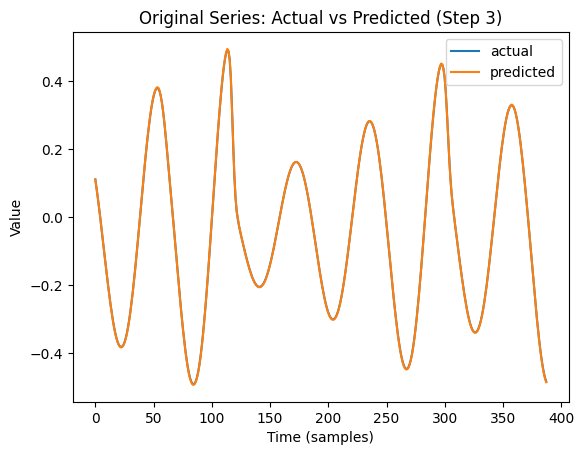

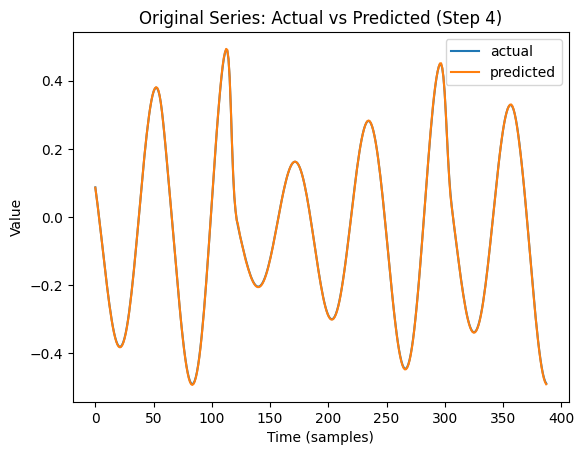

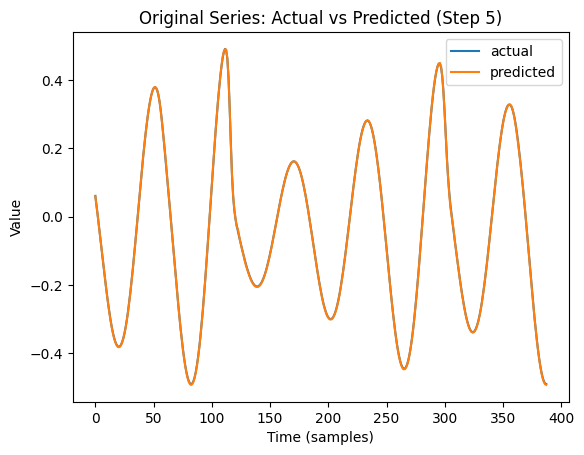

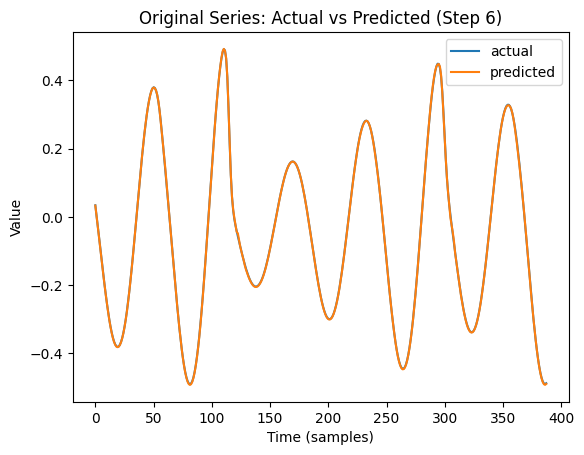

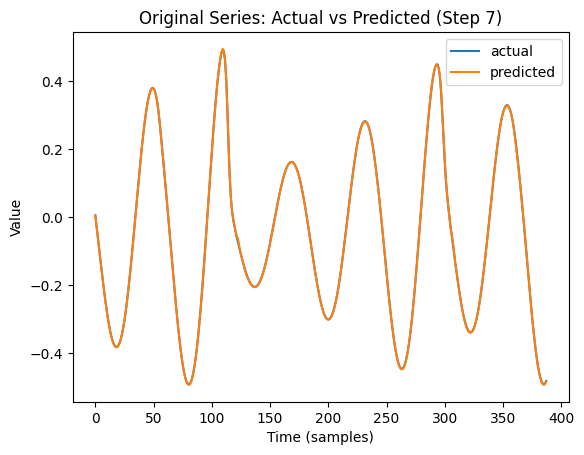

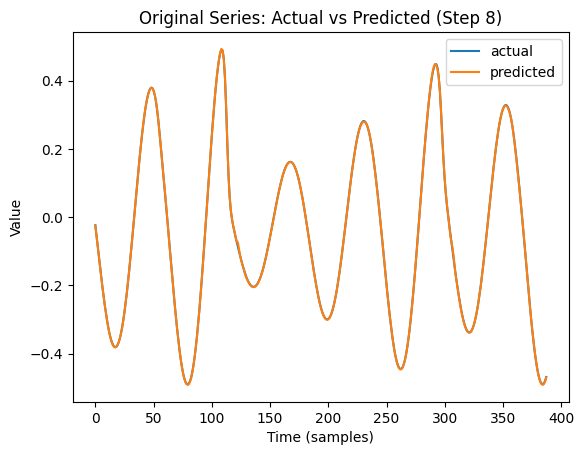

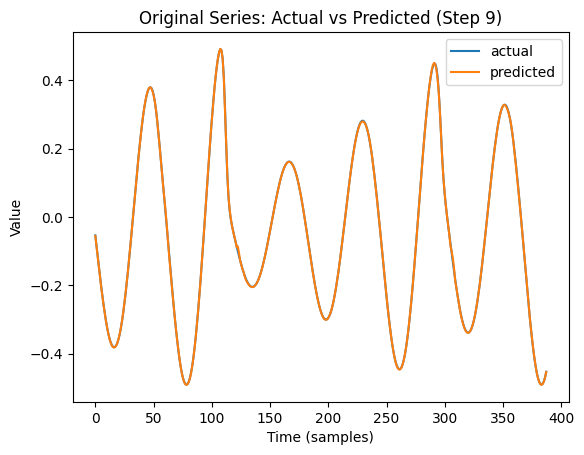

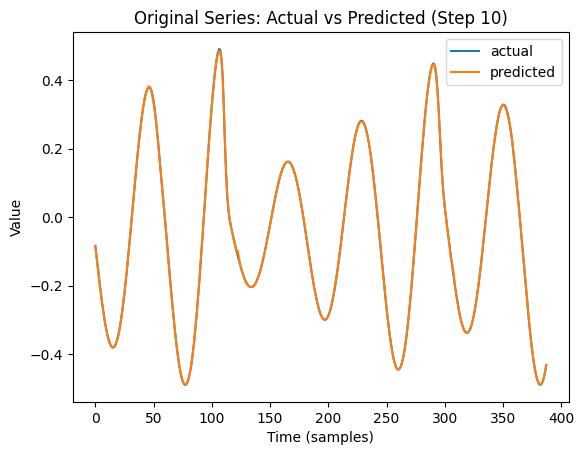

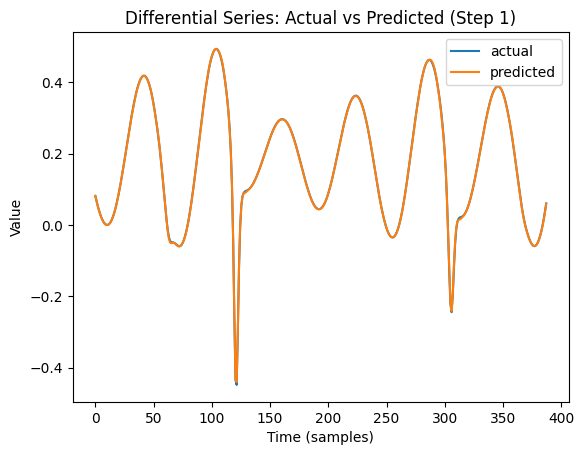

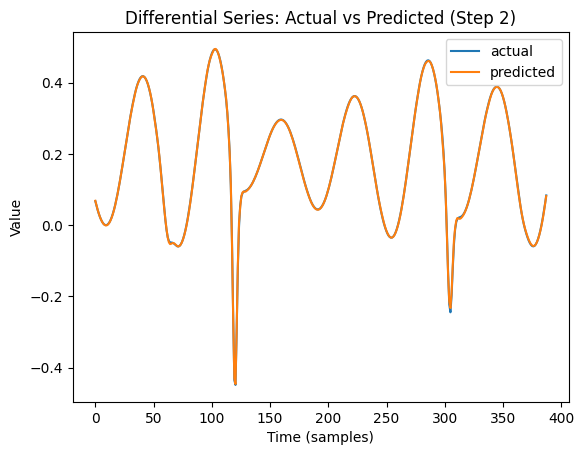

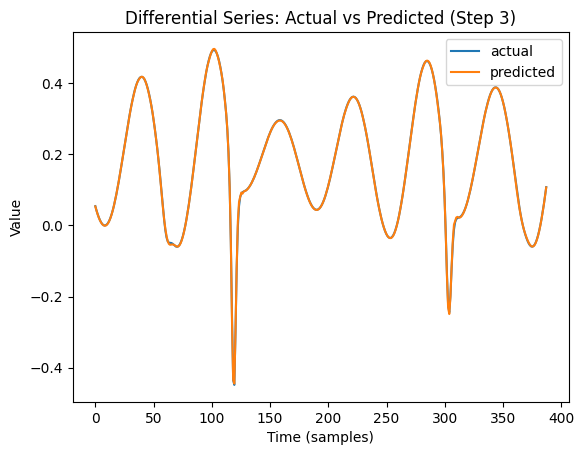

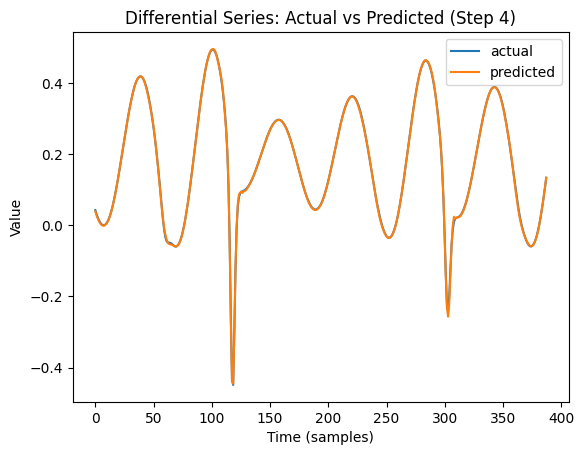

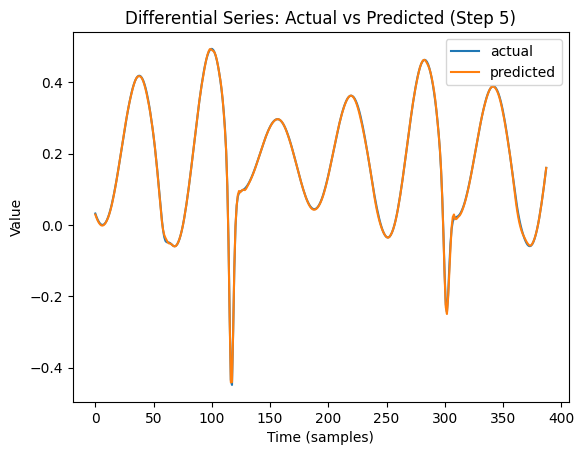

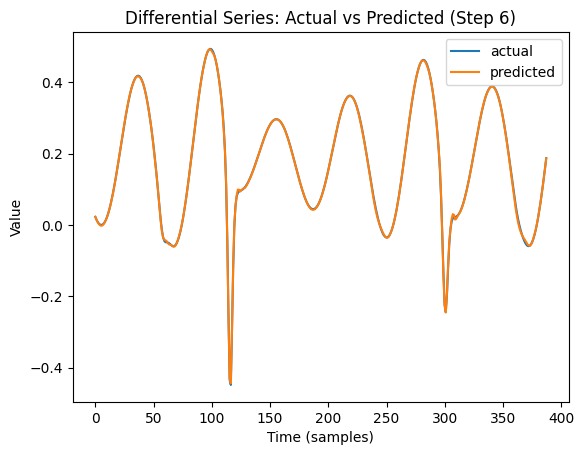

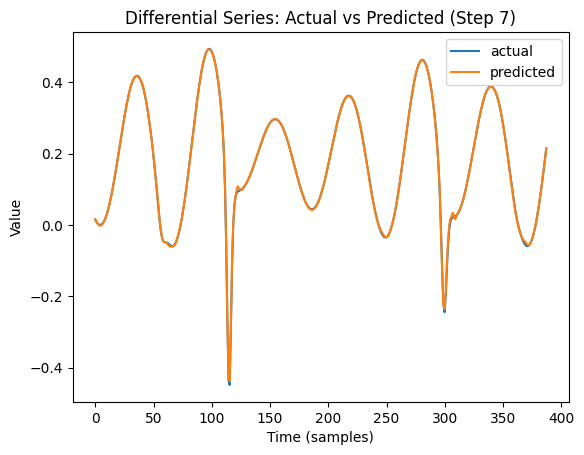

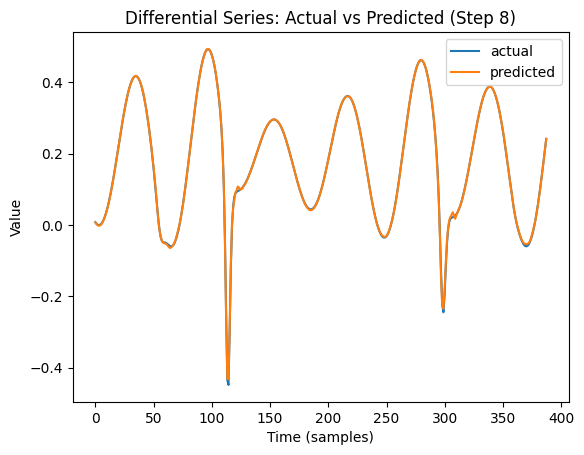

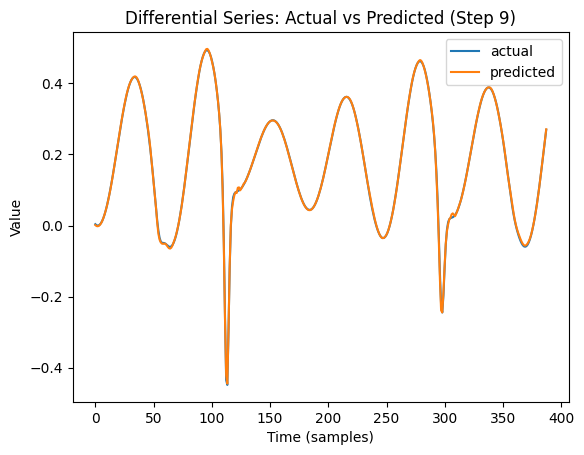

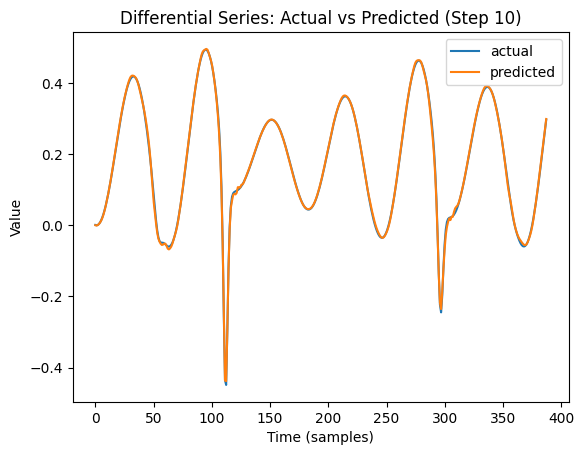

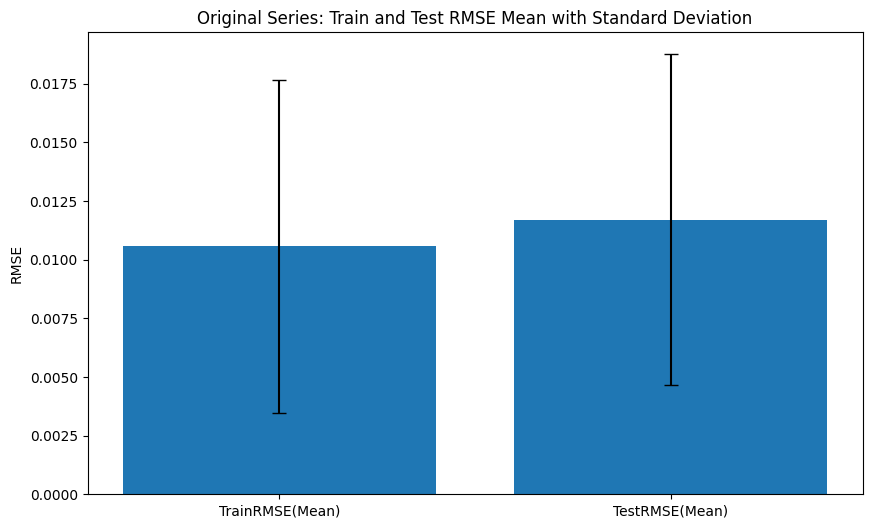

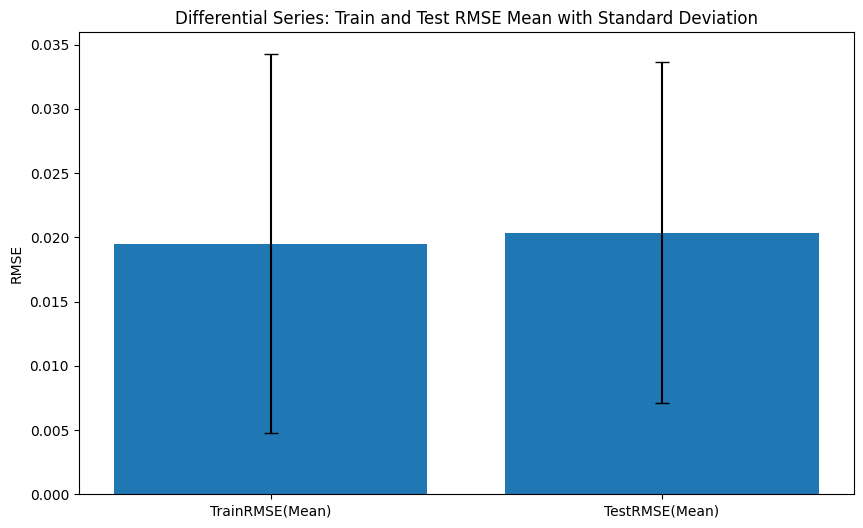

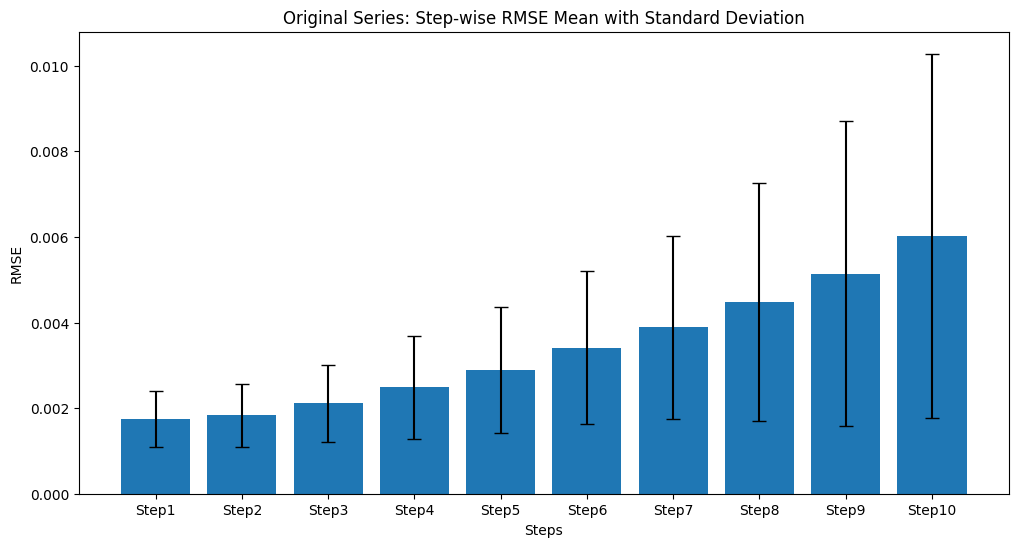

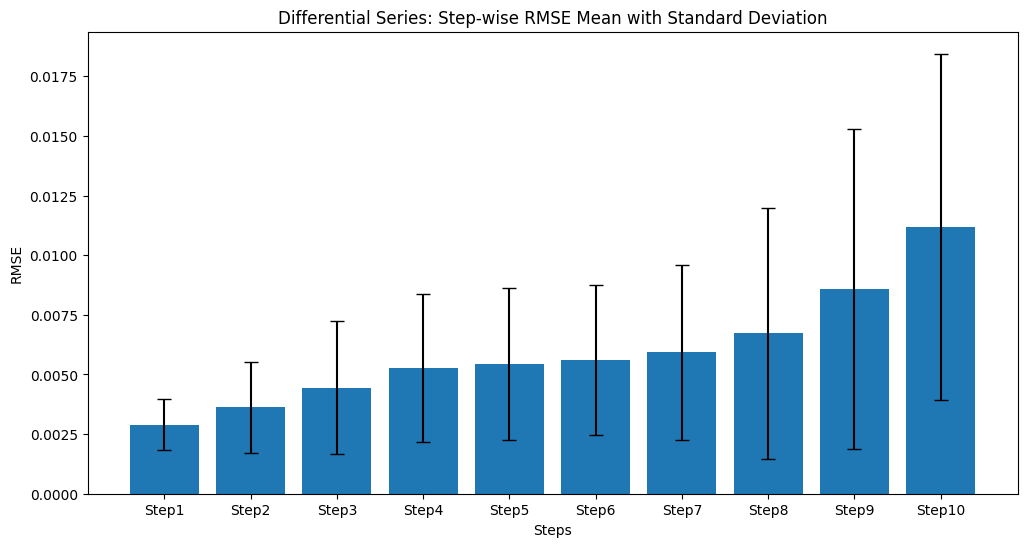

In [41]:
# Complete process
def analyze_and_visualize_results(train_acc_original, test_acc_original, Step_RMSE_original,
                                  train_acc_diff, test_acc_diff, Step_RMSE_diff,
                                  Best_Predict_Test, y_test_original, y_test_diff,
                                  Num_Exp, n_steps_out, name):

    # Prepare and save results
    arr_original_df, arr_diff_df = prepare_and_save_results(
        train_acc_original, test_acc_original, Step_RMSE_original,
        train_acc_diff, test_acc_diff, Step_RMSE_diff,
        Num_Exp, n_steps_out, name
    )

    # Calculate and save statistics
    stats_original_df, stats_diff_df = calculate_and_save_statistics(
        arr_original_df, arr_diff_df,
        train_acc_original, test_acc_original,
        train_acc_diff, test_acc_diff,
        Step_RMSE_original, Step_RMSE_diff,
        Num_Exp, n_steps_out, name
    )

    # Plot actual vs predicted values
    plot_actual_vs_predicted(Best_Predict_Test, Y_test_original, Y_test_diff, n_steps_out, name)

    # Plot RMSE mean and step-wise RMSE mean
    plot_rmse_means(stats_original_df, stats_diff_df, n_steps_out, name)

# Example usage:
analyze_and_visualize_results(train_acc_original, test_acc_original, Step_RMSE_original,
                              train_acc_diff, test_acc_diff, Step_RMSE_diff,
                              Best_Predict_Test, Y_test_original, Y_test_diff,
                              Num_Exp=30, n_steps_out=10, name="Rossler_series")

In [42]:
# Prepare and display results
def prepare_results(train_acc, test_acc, Step_RMSE, Num_Exp, n_steps_out):
    arr = np.dstack((train_acc, test_acc))
    arr = arr.reshape(Num_Exp, 2)
    arr = np.concatenate((arr, Step_RMSE), axis=1)
    arr = arr.reshape(Num_Exp, 2 + n_steps_out)

    ExpIndex = np.array(["Exp" + str(j + 1) for j in range(Num_Exp)])
    ExpIndex1 = ['TrainRMSE', 'TestRMSE'] + ["Step" + str(j + 1) for j in range(n_steps_out)]

    arr_df = pd.DataFrame(np.round_(arr, decimals=5), index=ExpIndex, columns=ExpIndex1)

    print("Results:")
    print(arr_df)

    return arr_df

arr_original_df = prepare_results(train_acc_original, test_acc_original, Step_RMSE_original, 30, 10)

Results:
       TrainRMSE  TestRMSE    Step1    Step2    Step3    Step4    Step5  \
Exp1     0.03226   0.03243  0.00343  0.00340  0.00436  0.00636  0.00798   
Exp2     0.02684   0.02725  0.00230  0.00269  0.00359  0.00465  0.00563   
Exp3     0.02315   0.02415  0.00276  0.00318  0.00365  0.00439  0.00523   
Exp4     0.02099   0.02262  0.00255  0.00291  0.00356  0.00423  0.00500   
Exp5     0.01869   0.02064  0.00217  0.00240  0.00318  0.00400  0.00444   
Exp6     0.01646   0.01831  0.00216  0.00231  0.00293  0.00374  0.00414   
Exp7     0.01454   0.01627  0.00236  0.00236  0.00270  0.00333  0.00388   
Exp8     0.01241   0.01391  0.00228  0.00221  0.00235  0.00287  0.00346   
Exp9     0.01232   0.01367  0.00309  0.00308  0.00283  0.00268  0.00311   
Exp10    0.00945   0.01053  0.00152  0.00181  0.00198  0.00222  0.00266   
Exp11    0.00973   0.01071  0.00210  0.00237  0.00245  0.00250  0.00274   
Exp12    0.00969   0.01063  0.00176  0.00221  0.00245  0.00262  0.00290   
Exp13    0.00902

<ipython-input-42-08c7a4d388d6>:18: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  arr_original_df = prepare_results(train_acc_original, test_acc_original, Step_RMSE_original, 30, 10)


In [43]:
# Compute and display statistics
def calculate_statistics(train_acc, test_acc, Step_RMSE, n_steps_out, Num_Exp):
    Train_Mean = np.mean(train_acc)
    Train_Std = np.std(train_acc)
    Train_CI_LB = Train_Mean - 1.96 * (Train_Std / np.sqrt(Num_Exp))
    Train_CI_UB = Train_Mean + 1.96 * (Train_Std / np.sqrt(Num_Exp))

    Test_Mean = np.mean(test_acc)
    Test_Std = np.std(test_acc)
    Test_CI_LB = Test_Mean - 1.96 * (Test_Std / np.sqrt(Num_Exp))
    Test_CI_UB = Test_Mean + 1.96 * (Test_Std / np.sqrt(Num_Exp))

    arr1 = np.vstack((
        [Train_Mean, Train_Std, Train_CI_LB, Train_CI_UB, np.min(train_acc), np.max(train_acc)],
        [Test_Mean, Test_Std, Test_CI_LB, Test_CI_UB, np.min(test_acc), np.max(test_acc)]
    ))

    for j in range(n_steps_out):
        Step_mean = np.mean(Step_RMSE[:, j])
        Step_std = np.std(Step_RMSE[:, j])
        Step_min = np.min(Step_RMSE[:, j])
        Step_CI_LB = Step_mean - 1.96 * (Step_std / np.sqrt(Num_Exp))
        Step_CI_UB = Step_mean + 1.96 * (Step_std / np.sqrt(Num_Exp))
        arr1 = np.vstack((arr1, [Step_mean, Step_std, Step_CI_LB, Step_CI_UB, Step_min, np.max(Step_RMSE[:, j])]))

    return pd.DataFrame(np.round_(arr1, decimals=5), index=arr_original_df.columns,
                        columns=['Mean', 'Standard Deviation', 'CI_LB', 'CI_UB', 'Min', 'Max'])

stats_original_df = calculate_statistics(train_acc_original, test_acc_original, Step_RMSE_original, 10, 30)

print("\nSummary Statistics:")
print(stats_original_df)


Summary Statistics:
              Mean  Standard Deviation    CI_LB    CI_UB      Min      Max
TrainRMSE  0.01057             0.00711  0.00803  0.01311  0.00397  0.03226
TestRMSE   0.01170             0.00706  0.00917  0.01422  0.00508  0.03243
Step1      0.00174             0.00066  0.00150  0.00197  0.00074  0.00343
Step2      0.00183             0.00073  0.00156  0.00209  0.00070  0.00340
Step3      0.00211             0.00089  0.00179  0.00243  0.00084  0.00436
Step4      0.00249             0.00120  0.00206  0.00292  0.00114  0.00636
Step5      0.00290             0.00147  0.00237  0.00343  0.00141  0.00798
Step6      0.00341             0.00179  0.00277  0.00405  0.00160  0.00921
Step7      0.00389             0.00214  0.00313  0.00466  0.00166  0.01043
Step8      0.00448             0.00278  0.00349  0.00548  0.00177  0.01239
Step9      0.00514             0.00356  0.00387  0.00642  0.00185  0.01502
Step10     0.00602             0.00426  0.00449  0.00755  0.00212  0.01824


<ipython-input-43-7de0ef72532a>:29: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  stats_original_df = calculate_statistics(train_acc_original, test_acc_original, Step_RMSE_original, 10, 30)


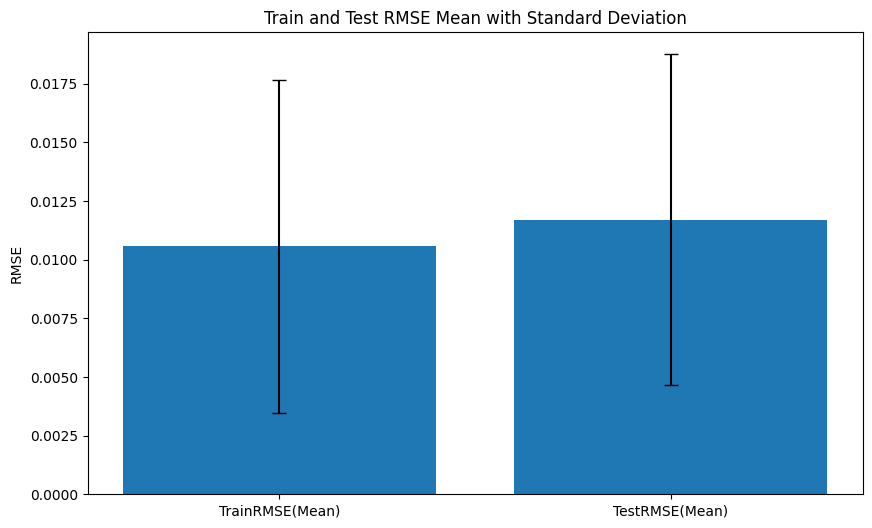

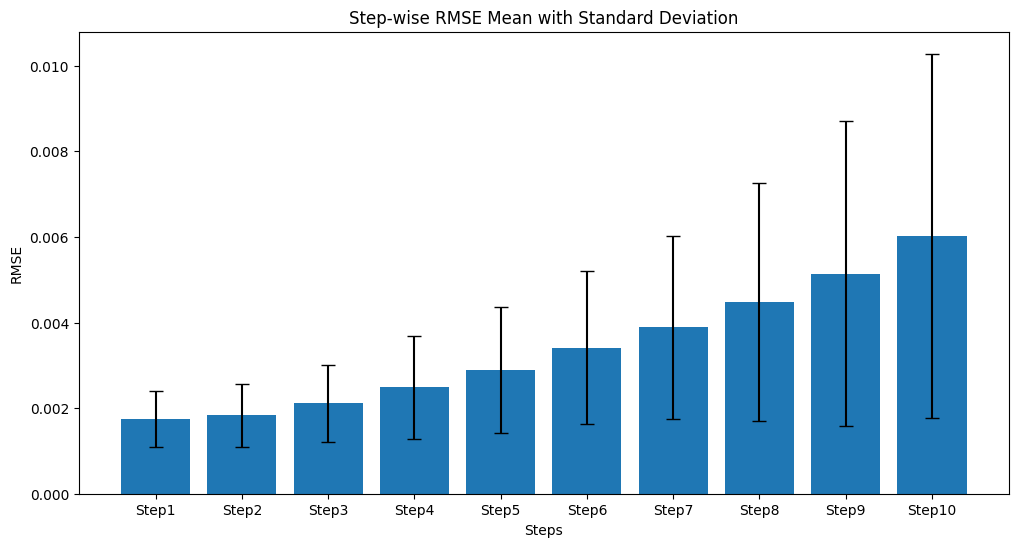

In [44]:
import matplotlib.pyplot as plt

# Plot the results
def plot_rmse_means(stats_df, n_steps_out):
    # Plot TrainRMSE and TestRMSE
    plt.figure(figsize=(10, 6))
    plt.bar(['TrainRMSE(Mean)', 'TestRMSE(Mean)'],
            stats_df['Mean'][:2], yerr=stats_df['Standard Deviation'][:2], capsize=5)
    plt.title('Train and Test RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    plt.show()

    # Plot Step-wise RMSE Mean
    plt.figure(figsize=(12, 6))
    plt.bar([f'Step{j+1}' for j in range(n_steps_out)],
            stats_df['Mean'][2:], yerr=stats_df['Standard Deviation'][2:], capsize=5)
    plt.title('Step-wise RMSE Mean with Standard Deviation')
    plt.ylabel('RMSE')
    plt.xlabel('Steps')
    plt.show()

plot_rmse_means(stats_original_df, 10)

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Rossler parameters (chaotic regime for these values)
a = 0.15
b = 0.20
c = 10.0



def rossler_equations(state):
    """
    Returns the time derivatives of (x, y, z) for the Rossler system.
    state = [x, y, z]
    """
    x, y, z = state
    dx = -z - y
    dy = x + a*y
    dz = b + z*(x - c)
    return np.array([dx, dy, dz])

def rossler_jacobian(state):
    """
    Returns the Jacobian matrix of partial derivatives for the Rossler system:
        dx/dx, dx/dy, dx/dz
        dy/dx, dy/dy, dy/dz
        dz/dx, dz/dy, dz/dz
    """
    x, y, z = state
    # dx/dx = 0, dx/dy = -1, dx/dz = -1
    # dy/dx = 1, dy/dy = a,  dy/dz = 0
    # dz/dx = z, dz/dy = 0,  dz/dz = x - c
    return np.array([
        [0.0,     -1.0,     -1.0],
        [1.0,      a,       0.0],
        [z,       0.0,   x - c]
    ])


def rk4_step_lyapunov(state, vecs, dt):
    """
    Perform one RK4 step for the main system state AND for the tangent vectors.
    state: 1D numpy array of shape (3,)
    vecs:  2D numpy array of shape (3,3), where each column is a tangent vector
    dt:    time step
    Return: (new_state, new_vecs)
    """
    # Main system derivatives
    k1 = rossler_equations(state)
    k2 = rossler_equations(state + 0.5*dt*k1)
    k3 = rossler_equations(state + 0.5*dt*k2)
    k4 = rossler_equations(state + dt*k3)
    new_state = state + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)

    # Jacobians for tangent vectors (for each sub-step)
    J1 = rossler_jacobian(state)
    J2 = rossler_jacobian(state + 0.5*dt*k1)
    J3 = rossler_jacobian(state + 0.5*dt*k2)
    J4 = rossler_jacobian(state + dt*k3)

    # Combine effect on tangent vectors
    # For each stage: v_new = v_old + dt*J * v_old
    # We'll do a simplified approach: average of Jacobians in typical RK fashion
    M = (J1 + 2*J2 + 2*J3 + J4) / 6.0
    new_vecs = vecs + dt * M.dot(vecs)

    return new_state, new_vecs



def lyapunov_exponents_rossler(dt=0.01, t_max=1000.0, transient=100.0,
                               orthonormal_steps=10):
    """
    Estimate Lyapunov exponents of the Rossler system using a variant of
    Benettin's method.

    dt: time step
    t_max: total integration time
    transient: time to discard initial transients
    orthonormal_steps: how often to re-orthonormalize tangent vectors
    Returns: (lambda_1, lambda_2, lambda_3)
    """
    steps = int(t_max / dt)
    discard_steps = int(transient / dt)

    # Initial condition for the main system
    state = np.array([1.0, 1.0, 1.0], dtype=np.float64)

    # Initialize the tangent vectors as the identity (3 x 3)
    vecs = np.eye(3, dtype=np.float64)

    # We will store cumulative sums of log norms
    log_sum = np.zeros(3, dtype=np.float64)

    # 1) First, run a short simulation to move the system away from initial transient
    for _ in range(discard_steps):
        state, vecs = rk4_step_lyapunov(state, vecs, dt)
        # Not strictly necessary to orthonormalize here, but let's do it once
        if (_ % orthonormal_steps) == 0:
            # Re-orthonormalize
            Q, R = np.linalg.qr(vecs)
            vecs = Q

    # Reset sums for main measurement
    log_sum[:] = 0.0

    # 2) Now integrate for the actual measurement
    measured_steps = steps - discard_steps
    count_reorth = 0

    for i in range(measured_steps):
        # One RK4 step for system + tangent vectors
        state, vecs = rk4_step_lyapunov(state, vecs, dt)

        # Every orthonormal_steps, we measure how much each vector grew/decayed
        if (i+1) % orthonormal_steps == 0:
            # Decompose with QR
            Q, R = np.linalg.qr(vecs)
            # The diagonal of R has the norms by which each vector grew
            diagR = np.diag(R)
            # Update log_sum
            log_sum += np.log(np.abs(diagR))
            # Replace vecs with the orthonormal Q
            vecs = Q
            count_reorth += 1

    # Compute average Lyapunov exponents
    # Each re-orthonormalization we record the growth => total integration time
    # for each 'orthonormal_steps' segment = (orthonormal_steps * dt).
    total_time_measured = (orthonormal_steps * dt) * count_reorth
    lyaps = log_sum / total_time_measured

    # Sort exponents: lyaps[0] >= lyaps[1] >= lyaps[2]
    lyaps = np.sort(lyaps)[::-1]
    return lyaps



def main():
    # Parameters for the Lyapunov exponent calculation
    dt = 0.01
    t_max = 5000.0      # total time for integration
    transient = 1000.0   # discard initial transients
    orthonormal_steps = 10

    # Compute the Lyapunov exponents
    l_exp = lyapunov_exponents_rossler(dt=dt, t_max=t_max,
                                       transient=transient,
                                       orthonormal_steps=orthonormal_steps)

    # Unpack them
    l1, l2, l3 = l_exp
    print(f"Lyapunov exponents = ({l1:.4f}, {l2:.4f}, {l3:.4f})")


    D_KY = 2.0 + (l1 + l2)/abs(l3)
    print(D_KY)


if __name__ == "__main__":
    main()


Lyapunov exponents = (0.0937, 0.0119, -10.7093)
2.009862385458639


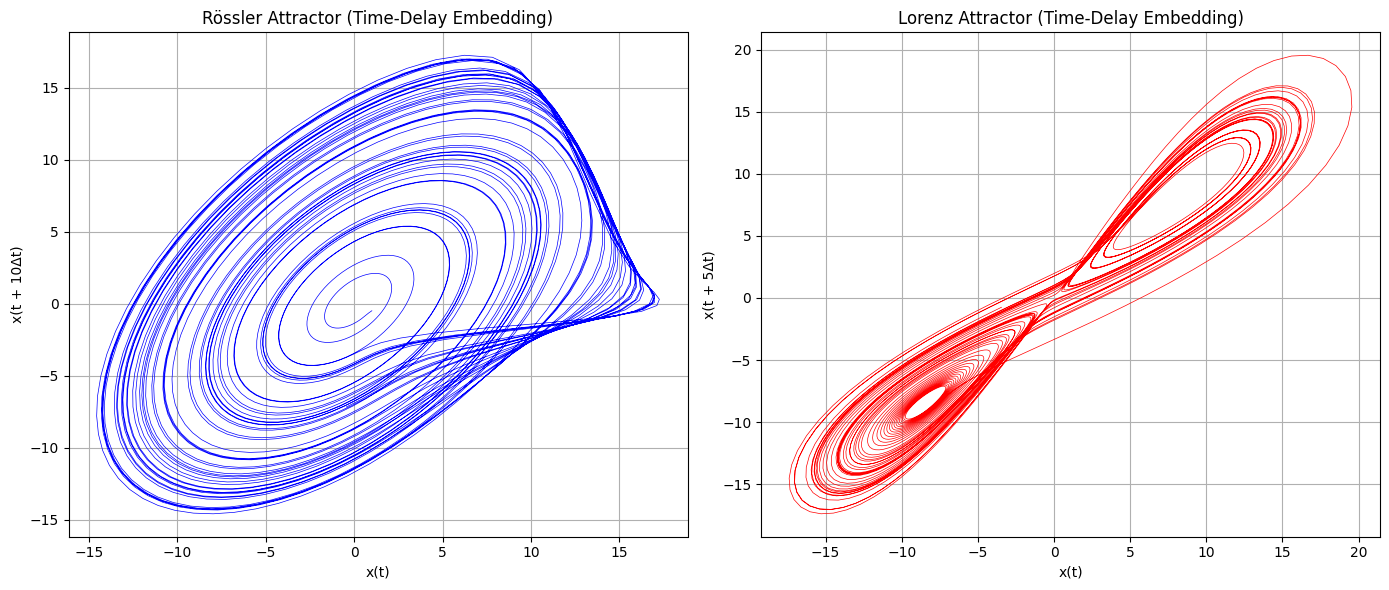

In [46]:
import numpy as np
import matplotlib.pyplot as plt


# Parameters for the Rössler system
a = 0.15
b = 0.20
c = 10.0

# Rössler system of equations
def rossler_equations(x, y, z):
    dxdt = -z - y
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return dxdt, dydt, dzdt

def rk4_step_rossler(x, y, z, dt):
    # k1
    dx1, dy1, dz1 = rossler_equations(x, y, z)
    k1x = dx1 * dt
    k1y = dy1 * dt
    k1z = dz1 * dt

    # k2
    dx2, dy2, dz2 = rossler_equations(x + 0.5*k1x, y + 0.5*k1y, z + 0.5*k1z)
    k2x = dx2 * dt
    k2y = dy2 * dt
    k2z = dz2 * dt

    # k3
    dx3, dy3, dz3 = rossler_equations(x + 0.5*k2x, y + 0.5*k2y, z + 0.5*k2z)
    k3x = dx3 * dt
    k3y = dy3 * dt
    k3z = dz3 * dt

    # k4
    dx4, dy4, dz4 = rossler_equations(x + k3x, y + k3y, z + k3z)
    k4x = dx4 * dt
    k4y = dy4 * dt
    k4z = dz4 * dt

    # Combine
    x_new = x + (k1x + 2*k2x + 2*k3x + k4x)/6.0
    y_new = y + (k1y + 2*k2y + 2*k3y + k4y)/6.0
    z_new = z + (k1z + 2*k2z + 2*k3z + k4z)/6.0

    return x_new, y_new, z_new

def simulate_rossler(dt=0.1, t_max=300.0, x0=1.0, y0=1.0, z0=1.0):
    steps = int(t_max/dt)

    # Arrays to store time series
    xs = np.zeros(steps)
    # ys and zs are not used for prediction; omit storing them
    # ys = np.zeros(steps)
    # zs = np.zeros(steps)

    # Set initial conditions
    x, y, z = x0, y0, z0

    for i in range(steps):
        xs[i] = x
        # ys[i] = y
        # zs[i] = z
        x, y, z = rk4_step_rossler(x, y, z, dt)

    return xs


# Parameters for the Lorenz system
sigma = 10.0
r = 28.0
b_lor = 8.0/3.0

# Lorenz system of equations
def lorenz_equations(x, y, z):
    dxdt = sigma * (y - x)
    dydt = r * x - y - x * z
    dzdt = x * y - b_lor * z
    return dxdt, dydt, dzdt

def rk4_step_lorenz(x, y, z, dt):
    # k1
    dx1, dy1, dz1 = lorenz_equations(x, y, z)
    k1x = dx1 * dt
    k1y = dy1 * dt
    k1z = dz1 * dt

    # k2
    dx2, dy2, dz2 = lorenz_equations(x + 0.5*k1x, y + 0.5*k1y, z + 0.5*k1z)
    k2x = dx2 * dt
    k2y = dy2 * dt
    k2z = dz2 * dt

    # k3
    dx3, dy3, dz3 = lorenz_equations(x + 0.5*k2x, y + 0.5*k2y, z + 0.5*k2z)
    k3x = dx3 * dt
    k3y = dy3 * dt
    k3z = dz3 * dt

    # k4
    dx4, dy4, dz4 = lorenz_equations(x + k3x, y + k3y, z + k3z)
    k4x = dx4 * dt
    k4y = dy4 * dt
    k4z = dz4 * dt

    # Combine
    x_new = x + (k1x + 2*k2x + 2*k3x + k4x)/6.0
    y_new = y + (k1y + 2*k2y + 2*k3y + k4y)/6.0
    z_new = z + (k1z + 2*k2z + 2*k3z + k4z)/6.0

    return x_new, y_new, z_new

def simulate_lorenz(dt=0.01, t_max=50.0, x0=1.0, y0=1.0, z0=1.0):
    steps = int(t_max/dt)

    # Arrays to store time series
    xs = np.zeros(steps)
    # ys and zs are not used for prediction; omit storing them
    # ys = np.zeros(steps)
    # zs = np.zeros(steps)

    # Set initial conditions
    x, y, z = x0, y0, z0

    for i in range(steps):
        xs[i] = x
        # ys[i] = y
        # zs[i] = z
        x, y, z = rk4_step_lorenz(x, y, z, dt)

    return xs



def time_delay_embedding(series, embedding_dim=2, delay=10):
    """
    Perform time-delay embedding on a 1D time series.

    Parameters:
    - series: 1D numpy array of the time series data.
    - embedding_dim: The embedding dimension D.
    - delay: The time delay τ (in number of samples).

    Returns:
    - embedded: 2D numpy array where each row is an embedded vector.
    """
    N = len(series)
    if N <= (embedding_dim - 1) * delay:
        raise ValueError("Time series is too short for the given embedding parameters.")

    embedded = np.zeros((N - (embedding_dim - 1) * delay, embedding_dim))
    for i in range(embedding_dim):
        embedded[:, i] = series[i * delay : N - (embedding_dim - 1) * delay + i * delay]

    return embedded



def main():
    # --- Simulate Rössler ---
    xs_r = simulate_rossler(dt=0.1, t_max=300.0,
                           x0=1.0, y0=1.0, z0=1.0)

    # --- Simulate Lorenz ---
    xs_l = simulate_lorenz(dt=0.01, t_max=50.0,
                          x0=1.0, y0=1.0, z0=1.0)

    # --- Time-Delay Embedding ---
    # Parameters for embedding
    embedding_dim = 2  # For 2D plots
    # Choose delay τ based on the sampling rate and system dynamics
    # Here, we choose τ such that τ * dt is roughly the characteristic time scale
    # You may need to adjust this based on autocorrelation or mutual information
    # For simplicity, let's choose τ=10 for Rössler and τ=5 for Lorenz

    tau_r = 10  # For Rössler
    tau_l = 5   # For Lorenz

    embedded_r = time_delay_embedding(xs_r, embedding_dim=embedding_dim, delay=tau_r)
    embedded_l = time_delay_embedding(xs_l, embedding_dim=embedding_dim, delay=tau_l)

    # --- Plotting ---
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Rössler: Plot x(t) vs x(t + τ)
    axes[0].plot(embedded_r[:, 0], embedded_r[:, 1], color='blue', linewidth=0.5)
    axes[0].set_title("Rössler Attractor (Time-Delay Embedding)")
    axes[0].set_xlabel("x(t)")
    axes[0].set_ylabel(f"x(t + {tau_r}Δt)")
    axes[0].grid(True)

    # Lorenz: Plot x(t) vs x(t + τ)
    axes[1].plot(embedded_l[:, 0], embedded_l[:, 1], color='red', linewidth=0.5)
    axes[1].set_title("Lorenz Attractor (Time-Delay Embedding)")
    axes[1].set_xlabel("x(t)")
    axes[1].set_ylabel(f"x(t + {tau_l}Δt)")
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
